# Assignment 2: Belief in Supernatural Evil and Guns
> Athina Davari 8180020\
> Department of Management Science and Technology\
> Athens University of Economics and Business

## Description
The purpose of this assignment is to replicate a study of belief in supernatural evil and attitudes towards guns in the United States.

## Setting the Scene
For the data analysis process, its necessary to import the packages we'll need.\
As a good practice, at the begining of the notebook we have a cell with all the imports. I also added ``%matplotlib inline`` to make my plot outputs appear and be stored within the notebook.

*In order to use the packages you must first install them.

In [1]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

from statsmodels.formula.api import logit
import statsmodels.formula.api as smf

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

## Obtain and Read the Data

In order to start the assignment, i had to download the data.
* Data obtained from the The Association of Religion Data Archives (https://www.thearda.com/) and in particular (https://www.thearda.com/Archive/NatBaylor.asp).

* They come from Wave IV of Baylor Religion Survey (2014) and can be found [here](https://www.thearda.com/Archive/Files/Descriptions/BRS2014.asp).

Data are in `data/BaylorReligionSurvey,WaveIV(2014).XLSX` file and we'll be referring to it by one variable. We'll use the read_excel() function provided by Pandas.

In [2]:
data_filename = "data/BaylorReligionSurvey,WaveIV(2014).xlsx"
data = pd.read_excel(data_filename,parse_dates=[['CREATED_ON', 'RESPONDENT_DATE']])
data

,CREATED_ON_RESPONDENT_DATE,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,PRACTICE,RESPONDENT_LANGUAGE,TEMPLATE_NUMBER_162048140,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,3/26/2014 1/24/2014,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,OTHER,en-US,162048140,...,TX,20086.696606,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,3/26/2014 1/24/2014,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,OTHER,en-US,162048140,...,TX,26218.573175,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,3/26/2014 1/24/2014,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,OTHER,en-US,162048140,...,ND,41408.889891,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,3/26/2014 1/24/2014,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,OTHER,en-US,162048140,...,TX,50023.027356,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,3/26/2014 1/24/2014,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,OTHER,en-US,162048140,...,IA,230734.428388,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,3/26/2014 3/10/2014,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,OTHER,es-AR,162048140,...,CA,17054.912661,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,3/26/2014 3/12/2014,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,OTHER,es-AR,162048140,...,CA,104454.336796,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,3/26/2014 3/19/2014,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,OTHER,es-AR,162048140,...,CA,153453.642034,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,3/26/2014 3/19/2014,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,OTHER,es-AR,162048140,...,CT,33324.200008,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


## Belief in Supernatural Evil Metric
In order to measure the belief in supernatural evil, we will use the answers to three questions asked by the participants in the survey:

* Whether the respondent believes in the devil (Q23A).

* Whether the respondent believes in hell (Q23C).

* Whether the respondent believes in demons (Q23G).

We have three ordinal variables with the same scale (1-4) and we want to combine these three questions to a single metric. 

Responses to the three variables were summed and averaged across the number of items answered to create supernatural evil metric. Supernatural evil metric measures the strength of belief in supernatural evil and ranges from 1 to 4. Supernatural evil metric's mean equals to 3.09

In [3]:
data["supernatural_evil"] = data[["Q23A", "Q23C", "Q23G"]].mean(axis = 1, skipna = True)
data[["Q23A", "Q23C", "Q23G","supernatural_evil"]]

,Q23A,Q23C,Q23G,supernatural_evil
0,4.0,4.0,4.0,4.000000
1,4.0,4.0,4.0,4.000000
2,3.0,2.0,2.0,2.333333
3,4.0,4.0,4.0,4.000000
4,4.0,4.0,4.0,4.000000
...,...,...,...,...
1567,4.0,2.0,4.0,3.333333
1568,3.0,3.0,3.0,3.000000
1569,4.0,4.0,3.0,3.666667
1570,3.0,3.0,3.0,3.000000


In [4]:
data["supernatural_evil"].mean(axis = 0, skipna = True)

3.089540760272468

### Justify approach with PCA
Principal components of PCA are new variables that are constructed as linear combinations or mixtures of the initial variables. 

The new variable supernatural evil is constructed as linear combinations of the initial variables `Q23A`, `Q23C`, `Q23G`. Previously, we assumed that the coefficients of all the variables were the same in our linear combinations of the variables that make up the new variable.

We want to check if the coefficients of all the variables in 1 component PCA model will be the same to justify previous approach. 

In [5]:
evil = data[["Q23A", "Q23C", "Q23G"]]
evil

,Q23A,Q23C,Q23G
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


In [6]:
X = evil[evil['Q23A'].notnull() & evil['Q23C'].notnull() & evil['Q23G'].notnull()]

In [7]:
n_components = 1

pca = PCA(n_components=n_components)
pca.fit(X)

print(pca.explained_variance_ratio_)

[0.90171495]


In [8]:
pca.components_

array([[-0.58568735, -0.57818501, -0.56804263]])

* The component is:

$$evil = -0.58568735 \times devil +  -0.57818501 \times hell + -0.56804263 \times demons $$

Τhe three component's values are very close, so we can say that the approach of taking answers to the three initial variables and then adding them and calculating the average of the number of elements answered to create a supernatural evil metric seems a logical approach.

## Variables Selection

Apart from the belief in supernatural evil metric, you will use several other variables to control your estimates. The variables are:

* Dependent Variables

  * Ban on Semi-Auto Guns
  * Ban on High-Capacity Ammo Clips
  * Banning Civilian Handguns 
  * Support for Concealed Carry Laws 
  * More Armed Security at Schools 
  * More Teachers/Faculty having Guns 
  * More Gun Safety Programs 
  * Expanded Mental Health Screening 
  
* Independept Variables
 
   * Religious Variables 
     * Attendance 
     * Bible (Human Error, History and Fables)
     * Biblical Inerrancy
     * Biblical Literalism 
     
  * Religious Affiliation
    * Conservative Protestant 
    * Mainline Protestant 
    * Black Protestant 
    * Catholic
    * Other
    * No Affiliation
  * Political Ideology 
  * Age 
  * Sex 
    * Female
    * Male
  * Race 
    * White
    * Hispanic
    * African American/Black 
    * Other 
  * Education 
    * Less Than High School 
    * High School or Equivalent 
    * Some College
    * College Degree 
    * Post-graduate Degree 
  * Household Income
  * Marital Status
    * Not Partnered/Single 
    * Married/Cohabitating
  * Children
    * No kids under 18 in home
    * Kids under 18 in home 
  * Area Demographics
    * Small Town/Rural
    * Urban Area
  * Region 
    * South 
    * Other Region
    

### Ban on Semi-Auto Guns

The Ban on Semi-Auto Guns corresponds to Q73A question "Please tell us whether you oppose or favor the following: A ban on semi-automatic weapons".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [9]:
print("Descriptives")
print(data['Q73A'].describe())
print("Value Counts")
print(data['Q73A'].value_counts())
print("Percentages")
print(data['Q73A'].value_counts(normalize=True))

Descriptives
count    1502.000000
mean        1.370839
std         0.483190
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Q73A, dtype: float64
Value Counts
1.0    945
2.0    557
Name: Q73A, dtype: int64
Percentages
1.0    0.629161
2.0    0.370839
Name: Q73A, dtype: float64


Now we will make a ban_guns dummy variable for Q73A

Values of ban_guns:

0. Oppose
1. Favor

In [10]:
data["ban_guns"] = np.where(data['Q73A']==2,0,data['Q73A'])
data[["ban_guns",'Q73A']]

,ban_guns,Q73A
0,0.0,2.0
1,NaN,NaN
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,NaN,NaN
1568,1.0,1.0
1569,1.0,1.0
1570,1.0,1.0


Here are the descriptives of the new variable:

In [11]:
print("Descriptives")
print(data['ban_guns'].describe())
print("Value Counts")
print(data['ban_guns'].value_counts())
print("Percentages")
print(data['ban_guns'].value_counts(normalize=True))

Descriptives
count    1502.000000
mean        0.629161
std         0.483190
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ban_guns, dtype: float64
Value Counts
1.0    945
0.0    557
Name: ban_guns, dtype: int64
Percentages
1.0    0.629161
0.0    0.370839
Name: ban_guns, dtype: float64


### Ban on High-Capacity Ammo Clips (Q73E)
The Ban on Semi-Auto Guns corresponds to Q73E question "Please tell us whether you oppose or favor the following: A ban on high-capacity ammunition clips that hold more than 10 bullets.".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [12]:
print("Descriptives")
print(data['Q73E'].describe())
print("Value Counts")
print(data['Q73E'].value_counts())
print("Percentages")
print(data['Q73E'].value_counts(normalize=True))

Descriptives
count    1502.000000
mean        1.328895
std         0.469968
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Q73E, dtype: float64
Value Counts
1.0    1008
2.0     494
Name: Q73E, dtype: int64
Percentages
1.0    0.671105
2.0    0.328895
Name: Q73E, dtype: float64


Now we will make a ban_clips dummy variable for Q73E

Values of ban_guns:

0. Oppose
1. Favor

In [13]:
data["ban_clips"] = np.where(data['Q73E']==2,0,data['Q73E'])
data[["ban_clips",'Q73E']]

,ban_clips,Q73E
0,0.0,2.0
1,NaN,NaN
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,1.0,1.0
1568,0.0,2.0
1569,1.0,1.0
1570,1.0,1.0


Here are the descriptives of the new variable:

In [14]:
print("Descriptives")
print(data['ban_clips'].describe())
print("Value Counts")
print(data['ban_clips'].value_counts())
print("Percentages")
print(data['ban_clips'].value_counts(normalize=True))

Descriptives
count    1502.000000
mean        0.671105
std         0.469968
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ban_clips, dtype: float64
Value Counts
1.0    1008
0.0     494
Name: ban_clips, dtype: int64
Percentages
1.0    0.671105
0.0    0.328895
Name: ban_clips, dtype: float64


### Banning Civilian Handguns (Q73G)
The Ban on Semi-Auto Guns corresponds to Q73G question "Please tell us whether you oppose or favor the following: Banning the possession of hand guns except by law enforcement.".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [15]:
print("Descriptives")
print(data['Q73G'].describe())
print("Value Counts")
print(data['Q73G'].value_counts())
print("Percentages")
print(data['Q73G'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        1.709527
std         0.454132
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Q73G, dtype: float64
Value Counts
2.0    1065
1.0     436
Name: Q73G, dtype: int64
Percentages
2.0    0.709527
1.0    0.290473
Name: Q73G, dtype: float64


Now we will make a ban_handguns dummy variable for Q73G

Values of ban_guns:

0. Oppose
1. Favor

In [16]:
data["ban_handguns"] = np.where(data['Q73G']==2,0,data['Q73G'])
data[["ban_handguns",'Q73E']]

,ban_handguns,Q73E
0,0.0,2.0
1,NaN,NaN
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,NaN,1.0
1568,1.0,2.0
1569,1.0,1.0
1570,1.0,1.0


Here are the descriptives of the new variable:

In [17]:
print("Descriptives")
print(data['ban_handguns'].describe())
print("Value Counts")
print(data['ban_handguns'].value_counts())
print("Percentages")
print(data['ban_handguns'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        0.290473
std         0.454132
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ban_handguns, dtype: float64
Value Counts
0.0    1065
1.0     436
Name: ban_handguns, dtype: int64
Percentages
0.0    0.709527
1.0    0.290473
Name: ban_handguns, dtype: float64


### Support for Concealed Carry Laws (Q73H)
The Ban on Semi-Auto Guns corresponds to Q73H question "Please tell us whether you oppose or favor the following: Laws that allow citizens to carry concealed guns.".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [18]:
print("Descriptives")
print(data['Q73H'].describe())
print("Value Counts")
print(data['Q73H'].value_counts())
print("Percentages")
print(data['Q73H'].value_counts(normalize=True))

Descriptives
count    1502.000000
mean        1.442077
std         0.496799
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Q73H, dtype: float64
Value Counts
1.0    838
2.0    664
Name: Q73H, dtype: int64
Percentages
1.0    0.557923
2.0    0.442077
Name: Q73H, dtype: float64


Now we will make a supp_carry_laws dummy variable for Q73H

Values of ban_guns:

0. Oppose
1. Favor

In [19]:
data["supp_carry_laws"] = np.where(data['Q73H']==2,0,data['Q73H'])
data[["supp_carry_laws",'Q73H']]

,supp_carry_laws,Q73H
0,1.0,1.0
1,NaN,NaN
2,0.0,2.0
3,0.0,2.0
4,0.0,2.0
...,...,...
1567,0.0,2.0
1568,0.0,2.0
1569,0.0,2.0
1570,0.0,2.0


Here are the descriptives of the new variable:

In [20]:
print("Descriptives")
print(data['supp_carry_laws'].describe())
print("Value Counts")
print(data['supp_carry_laws'].value_counts())
print("Percentages")
print(data['supp_carry_laws'].value_counts(normalize=True))

Descriptives
count    1502.000000
mean        0.557923
std         0.496799
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: supp_carry_laws, dtype: float64
Value Counts
1.0    838
0.0    664
Name: supp_carry_laws, dtype: int64
Percentages
1.0    0.557923
0.0    0.442077
Name: supp_carry_laws, dtype: float64


### More Armed Security at Schools (Q73C)
The Ban on Semi-Auto Guns corresponds to Q73C question "Please tell us whether you oppose or favor the following: Putting armed security guards/police in more schools".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [21]:
print("Descriptives")
print(data['Q73C'].describe())
print("Value Counts")
print(data['Q73C'].value_counts())
print("Percentages")
print(data['Q73C'].value_counts(normalize=True))

Descriptives
count    1510.000000
mean        1.378146
std         0.485085
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Q73C, dtype: float64
Value Counts
1.0    939
2.0    571
Name: Q73C, dtype: int64
Percentages
1.0    0.621854
2.0    0.378146
Name: Q73C, dtype: float64


Now we will make a school_sec dummy variable for Q73C

Values of ban_guns:

0. Oppose
1. Favor

In [22]:
data["school_sec"] = np.where(data['Q73C']==2,0,data['Q73C'])
data[["school_sec",'Q73C']]

,school_sec,Q73C
0,1.0,1.0
1,NaN,NaN
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,1.0,1.0
1568,0.0,2.0
1569,0.0,2.0
1570,0.0,2.0


Here are the descriptives of the new variable:

In [23]:
print("Descriptives")
print(data['school_sec'].describe())
print("Value Counts")
print(data['school_sec'].value_counts())
print("Percentages")
print(data['school_sec'].value_counts(normalize=True))

Descriptives
count    1510.000000
mean        0.621854
std         0.485085
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: school_sec, dtype: float64
Value Counts
1.0    939
0.0    571
Name: school_sec, dtype: int64
Percentages
1.0    0.621854
0.0    0.378146
Name: school_sec, dtype: float64


### More Teachers/Faculty having Guns (Q73F)
The Ban on Semi-Auto Guns corresponds to Q73F question "Please tell us whether you oppose or favor the following: More teachers and school officials having guns.".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [24]:
print("Descriptives")
print(data['Q73F'].describe())
print("Value Counts")
print(data['Q73F'].value_counts())
print("Percentages")
print(data['Q73F'].value_counts(normalize=True))

Descriptives
count    1504.000000
mean        1.705452
std         0.455991
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Q73F, dtype: float64
Value Counts
2.0    1061
1.0     443
Name: Q73F, dtype: int64
Percentages
2.0    0.705452
1.0    0.294548
Name: Q73F, dtype: float64


Now we will make a teachers_with_guns dummy variable for Q73F

Values of ban_guns:

0. Oppose
1. Favor

In [25]:
data["teachers_with_guns"] = np.where(data['Q73F']==2,0,data['Q73F'])
data[["teachers_with_guns",'Q73F']]

,teachers_with_guns,Q73F
0,1.0,1.0
1,NaN,NaN
2,0.0,2.0
3,0.0,2.0
4,1.0,1.0
...,...,...
1567,NaN,NaN
1568,0.0,2.0
1569,0.0,2.0
1570,0.0,2.0


Here are the descriptives of the new variable:

In [26]:
print("Descriptives")
print(data['teachers_with_guns'].describe())
print("Value Counts")
print(data['teachers_with_guns'].value_counts())
print("Percentages")
print(data['teachers_with_guns'].value_counts(normalize=True))

Descriptives
count    1504.000000
mean        0.294548
std         0.455991
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: teachers_with_guns, dtype: float64
Value Counts
0.0    1061
1.0     443
Name: teachers_with_guns, dtype: int64
Percentages
0.0    0.705452
1.0    0.294548
Name: teachers_with_guns, dtype: float64


### More Gun Safety Programs (Q73B)
The Ban on Semi-Auto Guns corresponds to Q73B question "Please tell us whether you oppose or favor the following: Expanded gun safety programs".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [27]:
print("Descriptives")
print(data['Q73B'].describe())
print("Value Counts")
print(data['Q73B'].value_counts())
print("Percentages")
print(data['Q73B'].value_counts(normalize=True))

Descriptives
count    1515.000000
mean        1.072607
std         0.259576
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Q73B, dtype: float64
Value Counts
1.0    1405
2.0     110
Name: Q73B, dtype: int64
Percentages
1.0    0.927393
2.0    0.072607
Name: Q73B, dtype: float64


Now we will make a safety_progr dummy variable for Q73B

Values of ban_guns:

0. Oppose
1. Favor

In [28]:
data["safety_progr"] = np.where(data['Q73B']==2,0,data['Q73B'])
data[["safety_progr",'Q73B']]

,safety_progr,Q73B
0,1.0,1.0
1,NaN,NaN
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,NaN,NaN
1568,1.0,1.0
1569,1.0,1.0
1570,1.0,1.0


Here are the descriptives of the new variable:

In [29]:
print("Descriptives")
print(data['safety_progr'].describe())
print("Value Counts")
print(data['safety_progr'].value_counts())
print("Percentages")
print(data['safety_progr'].value_counts(normalize=True))

Descriptives
count    1515.000000
mean        0.927393
std         0.259576
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: safety_progr, dtype: float64
Value Counts
1.0    1405
0.0     110
Name: safety_progr, dtype: int64
Percentages
1.0    0.927393
0.0    0.072607
Name: safety_progr, dtype: float64


### Expanded Mental Health Screening (Q73D)
The Ban on Semi-Auto Guns corresponds to Q73D question "Please tell us whether you oppose or favor the following: Better mental health screening of gun buyers.".

Values of the variable:
1. Favor
2. Oppose

Here are the descriptives of the variable:

In [30]:
print("Descriptives")
print(data['Q73D'].describe())
print("Value Counts")
print(data['Q73D'].value_counts())
print("Percentages")
print(data['Q73D'].value_counts(normalize=True))

Descriptives
count    1512.000000
mean        1.091931
std         0.289024
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Q73D, dtype: float64
Value Counts
1.0    1373
2.0     139
Name: Q73D, dtype: int64
Percentages
1.0    0.908069
2.0    0.091931
Name: Q73D, dtype: float64


Now we will make a m_health_screening dummy variable for Q73D

Values of ban_guns:

0. Oppose
1. Favor

In [31]:
data["m_health_screening"] = np.where(data['Q73D']==2,0,data['Q73D'])
data[["m_health_screening",'Q73D']]

,m_health_screening,Q73D
0,1.0,1.0
1,NaN,NaN
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,1.0,1.0
1568,1.0,1.0
1569,1.0,1.0
1570,1.0,1.0


Here are the descriptives of the new variable:

In [32]:
print("Descriptives")
print(data['m_health_screening'].describe())
print("Value Counts")
print(data['m_health_screening'].value_counts())
print("Percentages")
print(data['m_health_screening'].value_counts(normalize=True))

Descriptives
count    1512.000000
mean        0.908069
std         0.289024
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: m_health_screening, dtype: float64
Value Counts
1.0    1373
0.0     139
Name: m_health_screening, dtype: int64
Percentages
1.0    0.908069
0.0    0.091931
Name: m_health_screening, dtype: float64


## Religious Variables
### Attendance (Q4)
Attendance is q4 question 'How often do you attend religious services at a place of worship?'
It is a scale variable so we will not create dummies.

Descriptives of Q4:

In [33]:
print("Descriptives")
print(data['Q4'].describe())
print("Value Counts")
print(data['Q4'].value_counts())
print("Percentages")
print(data['Q4'].value_counts(normalize=True))

Descriptives
count    1556.000000
mean        3.676735
std         2.932510
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max         8.000000
Name: Q4, dtype: float64
Value Counts
0.0    378
7.0    348
3.0    161
2.0    159
1.0    123
5.0    119
8.0    118
6.0    111
4.0     39
Name: Q4, dtype: int64
Percentages
0.0    0.242931
7.0    0.223650
3.0    0.103470
2.0    0.102185
1.0    0.079049
5.0    0.076478
8.0    0.075835
6.0    0.071337
4.0    0.025064
Name: Q4, dtype: float64


In [34]:
data["attendance"] = data['Q4']

### Biblical Inerrancy
Biblical Inerrancy will be a result of Q17 question "Which one statement comes closest to your personal beliefs about the Bible? (Please mark only one box.)"

Values of the biblical inerracy:

0. I do not believe in biblical Inerracy
1. Believe in Biblical Inerrancy (2. The Bible is perfectly true, but it should not be taken literally, word-for-word. We must interpret its meaning.)

In [35]:
print("Descriptives")
print(data['Q17'].describe())
print("Value Counts")
print(data['Q17'].value_counts())
print("Percentages")
print(data['Q17'].value_counts(normalize=True))

Descriptives
count    1549.000000
mean        2.910910
std         1.953547
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         8.000000
Name: Q17, dtype: float64
Value Counts
2.0    524
4.0    376
1.0    355
3.0    150
8.0    144
Name: Q17, dtype: int64
Percentages
2.0    0.338283
4.0    0.242737
1.0    0.229180
3.0    0.096837
8.0    0.092963
Name: Q17, dtype: float64


In [36]:
data["b_inerrancy"] = np.where(data['Q17'] == 2,1,0)
data["b_inerrancy"] = np.where(data['Q17'] == 8,np.NaN,data["b_inerrancy"])
data["b_inerrancy"] = np.where(data['Q17'].isna(),np.NaN,data["b_inerrancy"])
data[["b_inerrancy",'Q17']]

,b_inerrancy,Q17
0,0.0,1.0
1,0.0,1.0
2,1.0,2.0
3,1.0,2.0
4,0.0,1.0
...,...,...
1567,0.0,1.0
1568,1.0,2.0
1569,1.0,2.0
1570,1.0,2.0


In [37]:
print("Descriptives")
print(data['b_inerrancy'].describe())
print("Value Counts")
print(data['b_inerrancy'].value_counts())
print("Percentages")
print(data['b_inerrancy'].value_counts(normalize=True))

Descriptives
count    1405.000000
mean        0.372954
std         0.483762
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: b_inerrancy, dtype: float64
Value Counts
0.0    881
1.0    524
Name: b_inerrancy, dtype: int64
Percentages
0.0    0.627046
1.0    0.372954
Name: b_inerrancy, dtype: float64


### Biblical Literalism (Q17)
Biblical Literalism will be a result of Q17 question "Which one statement comes closest to your personal beliefs about the Bible? (Please mark only one box.)"

Values of the biblical inerracy:

0. I do not believe in Biblical Literalism
1. Believe in Biblical Literalism (1. The Bible means exactly what it says. It should be taken literally, word-for-word, on all subjects.)

In [38]:
print("Descriptives")
print(data['Q17'].describe())
print("Value Counts")
print(data['Q17'].value_counts())
print("Percentages")
print(data['Q17'].value_counts(normalize=True))

Descriptives
count    1549.000000
mean        2.910910
std         1.953547
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         8.000000
Name: Q17, dtype: float64
Value Counts
2.0    524
4.0    376
1.0    355
3.0    150
8.0    144
Name: Q17, dtype: int64
Percentages
2.0    0.338283
4.0    0.242737
1.0    0.229180
3.0    0.096837
8.0    0.092963
Name: Q17, dtype: float64


In [39]:
data["b_literalism"] = np.where(data['Q17'] == 1,1,0)
data["b_literalism"] = np.where(data['Q17'] == 8,np.NaN,data["b_literalism"])
data["b_literalism"] = np.where(data['Q17'].isna(),np.NaN,data["b_literalism"])
data[["b_literalism",'Q17']]

,b_literalism,Q17
0,1.0,1.0
1,1.0,1.0
2,0.0,2.0
3,0.0,2.0
4,1.0,1.0
...,...,...
1567,1.0,1.0
1568,0.0,2.0
1569,0.0,2.0
1570,0.0,2.0


In [40]:
print("Descriptives")
print(data['b_literalism'].describe())
print("Value Counts")
print(data['b_literalism'].value_counts())
print("Percentages")
print(data['b_literalism'].value_counts(normalize=True))

Descriptives
count    1405.000000
mean        0.252669
std         0.434697
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: b_literalism, dtype: float64
Value Counts
0.0    1050
1.0     355
Name: b_literalism, dtype: int64
Percentages
0.0    0.747331
1.0    0.252669
Name: b_literalism, dtype: float64


## Religious Affiliation (RELTRAD)
RELTRAD question :"Religious Tradition"

Values:
1. Evangelical Protestant	
2. Mainline Protestant	
3. Black Protestant	
4. Catholic	
5. Jewish	
6. Other	
7. No Affiliation

We want to work with :
* Conservative Protestant (Evangelical Protestant)
* Mainline Protestant
* Black Protestant
* Catholic
* Other (Jewish + Other)
* No Affiliation

We will create 6-1=5 dummy variables.

Here are the descriptives of the variable:

In [41]:
print("Descriptives")
print(data['RELTRAD'].describe())
print("Value Counts")
print(data['RELTRAD'].value_counts())
print("Percentages")
print(data['RELTRAD'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        3.312627
std         2.096692
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: RELTRAD, dtype: float64
Value Counts
1.0    421
4.0    369
2.0    250
7.0    214
3.0    106
6.0     88
5.0     33
Name: RELTRAD, dtype: int64
Percentages
1.0    0.284267
4.0    0.249156
2.0    0.168805
7.0    0.144497
3.0    0.071573
6.0    0.059419
5.0    0.022282
Name: RELTRAD, dtype: float64


### Conservative Protestant
Conservative Protestant is value 1 from RELTRAD question "Religious Tradition".

Values of the variable:

0. No Conservative Protestant
1. Conservative Protestant

In [42]:
data["c_protestant"] = np.where(data['RELTRAD'] == 1,1,data['RELTRAD'])
data["c_protestant"] = np.where(~(data['RELTRAD'].isna()) & (data['RELTRAD'] != 1),0,data["c_protestant"])
data[["c_protestant",'RELTRAD']]

,c_protestant,RELTRAD
0,1.0,1.0
1,0.0,3.0
2,0.0,2.0
3,0.0,2.0
4,1.0,1.0
...,...,...
1567,0.0,4.0
1568,0.0,4.0
1569,0.0,6.0
1570,0.0,4.0


Here are the decriptives of the new variable.

In [43]:
print("Descriptives")
print(data['c_protestant'].describe())
print("Value Counts")
print(data['c_protestant'].value_counts())
print("Percentages")
print(data['c_protestant'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.284267
std         0.451217
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: c_protestant, dtype: float64
Value Counts
0.0    1060
1.0     421
Name: c_protestant, dtype: int64
Percentages
0.0    0.715733
1.0    0.284267
Name: c_protestant, dtype: float64


### Mainline Protestant
Mainline Protestant is value 2 from RELTRAD question "Religious Tradition".

Values of the variable:

0. No Mainline Protestant
1. Mainline Protestant

In [44]:
data["m_protestant"] = np.where(data['RELTRAD'] == 2,1,data['RELTRAD'])
data["m_protestant"] = np.where(~(data['RELTRAD'].isna()) & (data['RELTRAD'] != 2),0,data["m_protestant"])
data[["m_protestant",'RELTRAD']]

,m_protestant,RELTRAD
0,0.0,1.0
1,0.0,3.0
2,1.0,2.0
3,1.0,2.0
4,0.0,1.0
...,...,...
1567,0.0,4.0
1568,0.0,4.0
1569,0.0,6.0
1570,0.0,4.0


Here are the decriptives of the new variable.

In [45]:
print("Descriptives")
print(data['m_protestant'].describe())
print("Value Counts")
print(data['m_protestant'].value_counts())
print("Percentages")
print(data['m_protestant'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.168805
std         0.374706
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: m_protestant, dtype: float64
Value Counts
0.0    1231
1.0     250
Name: m_protestant, dtype: int64
Percentages
0.0    0.831195
1.0    0.168805
Name: m_protestant, dtype: float64


### Black Protestant
Black Protestant is value 3 from RELTRAD question "Religious Tradition".

Values of the variable:

0. No Black Protestant
1. Black Protestant

In [46]:
data["b_protestant"] = np.where(data['RELTRAD'] == 3,1,data['RELTRAD'])
data["b_protestant"] = np.where(~(data['RELTRAD'].isna()) & (data['RELTRAD'] != 3),0,data["b_protestant"])
data[["b_protestant",'RELTRAD']]

,b_protestant,RELTRAD
0,0.0,1.0
1,1.0,3.0
2,0.0,2.0
3,0.0,2.0
4,0.0,1.0
...,...,...
1567,0.0,4.0
1568,0.0,4.0
1569,0.0,6.0
1570,0.0,4.0


Here are the decriptives of the new variable.

In [47]:
print("Descriptives")
print(data['b_protestant'].describe())
print("Value Counts")
print(data['b_protestant'].value_counts())
print("Percentages")
print(data['b_protestant'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.071573
std         0.257867
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: b_protestant, dtype: float64
Value Counts
0.0    1375
1.0     106
Name: b_protestant, dtype: int64
Percentages
0.0    0.928427
1.0    0.071573
Name: b_protestant, dtype: float64


### Catholic
Chatholic is value 4 from RELTRAD question "Religious Tradition".

Values of the variable:

0. No Catholic
1. Catholic

In [48]:
data["catholic"] = np.where(data['RELTRAD'] == 4,1,data['RELTRAD'])
data["catholic"] = np.where(~(data['RELTRAD'].isna()) & (data['RELTRAD'] != 4),0,data["catholic"])
data[["catholic",'RELTRAD']]

,catholic,RELTRAD
0,0.0,1.0
1,0.0,3.0
2,0.0,2.0
3,0.0,2.0
4,0.0,1.0
...,...,...
1567,1.0,4.0
1568,1.0,4.0
1569,0.0,6.0
1570,1.0,4.0


Here are the decriptives of the new variable.

In [49]:
print("Descriptives")
print(data['catholic'].describe())
print("Value Counts")
print(data['catholic'].value_counts())
print("Percentages")
print(data['catholic'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.249156
std         0.432670
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: catholic, dtype: float64
Value Counts
0.0    1112
1.0     369
Name: catholic, dtype: int64
Percentages
0.0    0.750844
1.0    0.249156
Name: catholic, dtype: float64


### Other
Other is value 5(Jewish) and 6(Other) from RELTRAD question "Religious Tradition".

Values of the variable:

0. Not other religion
1. Other religion

In [50]:
data["other_rel"] = np.where((data['RELTRAD'] == 5) | (data['RELTRAD'] == 6),1,data['RELTRAD'])
data["other_rel"] = np.where(~(data['RELTRAD'].isna()) & (data['RELTRAD'] != 5) & (data['RELTRAD'] != 6),0,data["other_rel"])
data[["other_rel",'RELTRAD']]

,other_rel,RELTRAD
0,0.0,1.0
1,0.0,3.0
2,0.0,2.0
3,0.0,2.0
4,0.0,1.0
...,...,...
1567,0.0,4.0
1568,0.0,4.0
1569,1.0,6.0
1570,0.0,4.0


Here are the decriptives of the new variable.

In [51]:
print("Descriptives")
print(data['other_rel'].describe())
print("Value Counts")
print(data['other_rel'].value_counts())
print("Percentages")
print(data['other_rel'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.081702
std         0.274002
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: other_rel, dtype: float64
Value Counts
0.0    1360
1.0     121
Name: other_rel, dtype: int64
Percentages
0.0    0.918298
1.0    0.081702
Name: other_rel, dtype: float64


### Political Ideology (Q31)
Political Ideology is Q31 question "How would you describe yourself politically?".

Values:
1. Extremely conservative
2. Conservative
3. Leaning conservative
4. Moderate
5. Leaning liberal
6. Liberal
7. Extremely liberal

Political Ideology is an ordinal variable. We don't need dummies.

Here are the descriptives of the variable.

In [52]:
print("Descriptives")
print(data['Q32'].describe())
print("Value Counts")
print(data['Q32'].value_counts())
print("Percentages")
print(data['Q32'].value_counts(normalize=True))

Descriptives
count    1521.000000
mean        4.284024
std         1.841642
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: Q32, dtype: float64
Value Counts
4.0    429
6.0    274
7.0    224
2.0    212
3.0    139
5.0    126
1.0    117
Name: Q32, dtype: int64
Percentages
4.0    0.282051
6.0    0.180145
7.0    0.147272
2.0    0.139382
3.0    0.091387
5.0    0.082840
1.0    0.076923
Name: Q32, dtype: float64


In [53]:
data["political_id"] = data['Q32']

### Age (AGE)
Age variable is the question that shows the age of the participants. Its a scale variable and we don't need dummies.

Here are the descriptives of the variable:

In [54]:
print("Descriptives")
print(data['AGE'].describe())

Descriptives
count    1572.000000
mean       49.162214
std        21.018613
min         0.000000
25%        35.000000
50%        52.000000
75%        64.000000
max        99.000000
Name: AGE, dtype: float64


## Race
### White 
I will create white variable only for verification purposes.

White variable will be a result of Q88A (value of Q88A=1) and in order to consider one peson black i will check also participants not to be the same time Hispanic ((Q88F)+(Q89)) or African American/Black (Q88B) or Other (Q88F) or American Indian or Alaska Native (Q88C) or Asian (Q88D) or Native Hawaiian or other Pacific Islander (Q88E).

In [55]:
print("Descriptives")
print(data['Q88A'].describe())
print("Value Counts")
print(data['Q88A'].value_counts())
print("Percentages")
print(data['Q88A'].value_counts(normalize=True))

Descriptives
count    1303.000000
mean        1.099770
std         0.299808
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Q88A, dtype: float64
Value Counts
1.0    1173
2.0     130
Name: Q88A, dtype: int64
Percentages
1.0    0.90023
2.0    0.09977
Name: Q88A, dtype: float64


Values of white:

0. other race except fron white race
1. only white race

In [56]:
data["white"] = np.where(data['Q88A']==1,1,data['Q88A'])
data["white"] = np.where(data['Q88A']==2,0,data["white"])
data["white"] = np.where((data['Q88B']==1) | (data['Q88C']==1) | (data['Q88D']==1) | (data['Q88E']==1) | (data['Q88F']==1) 
                         | (data['Q89']==2) | (data['Q89']==3) | (data['Q89']==4) | (data['Q89']==5) ,0,data["white"])
data["white"] = np.where(((data['Q88A']==2) | (data["Q88A"].isna())) & 
                         ((data['Q88B']==2) | (data["Q88B"].isna())) & 
                         ((data['Q88C']==2) | (data["Q88C"].isna())) &
                         ((data['Q88D']==2) | (data["Q88D"].isna())) &
                         ((data['Q88E']==2) | (data["Q88E"].isna())) & 
                         ((data['Q88F']==2) | (data["Q88F"].isna())) & 
                         ((data['Q89']==1) | (data['Q89']==8) | data['Q89'].isna())
                         ,np.NaN,data["white"])
data[["white",'Q88A']]

,white,Q88A
0,NaN,NaN
1,0.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
1567,0.0,NaN
1568,0.0,NaN
1569,0.0,2.0
1570,0.0,NaN


In [57]:
print("Descriptives")
print(data['white'].describe())
print("Value Counts")
print(data['white'].value_counts())
print("Percentages")
print(data['white'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.717758
std         0.450242
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: white, dtype: float64
Value Counts
1.0    1063
0.0     418
Name: white, dtype: int64
Percentages
1.0    0.717758
0.0    0.282242
Name: white, dtype: float64


#### Black 
Black variable will be a result of Q88B (value of Q88B=1) and in order to consider one peson black i will check also participants not to be the same time Hispanic ((Q88F)+(Q89)) or white (Q88A) or Other (Q88F) or American Indian or Alaska Native (Q88C) or Asian (Q88D) or Native Hawaiian or other Pacific Islander (Q88E).

Values of black:

0. other race except fron black race or not only black
1. only black race

In [58]:
data["black"] = np.where(data['Q88B']==1,1,data['Q88B'])
data["black"] = np.where(data['Q88B']==2,0,data["black"])
data["black"] = np.where((data['Q88A']==1) | (data['Q88C']==1) | (data['Q88D']==1) | (data['Q88E']==1) | (data['Q88F']==1) 
                         | (data['Q89']==2) | (data['Q89']==3) | (data['Q89']==4) | (data['Q89']==5),0,data["black"])
data["black"] = np.where(((data['Q88A']==2) | (data["Q88A"].isna())) & 
                         ((data['Q88B']==2) | (data["Q88B"].isna())) & 
                         ((data['Q88C']==2) | (data["Q88C"].isna())) &
                         ((data['Q88D']==2) | (data["Q88D"].isna())) &
                         ((data['Q88E']==2) | (data["Q88E"].isna())) & 
                         ((data['Q88F']==2) | (data["Q88F"].isna())) & 
                         ((data['Q89']==1) | (data['Q89']==8) | data['Q89'].isna())
                         ,np.NaN,data["black"])
data[["black",'Q88B']]

,black,Q88B
0,NaN,NaN
1,1.0,1.0
2,0.0,2.0
3,0.0,2.0
4,0.0,2.0
...,...,...
1567,0.0,NaN
1568,0.0,NaN
1569,0.0,2.0
1570,0.0,NaN


In [59]:
print("Descriptives")
print(data['black'].describe())
print("Value Counts")
print(data['black'].value_counts())
print("Percentages")
print(data['black'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.112762
std         0.316408
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: black, dtype: float64
Value Counts
0.0    1314
1.0     167
Name: black, dtype: int64
Percentages
0.0    0.887238
1.0    0.112762
Name: black, dtype: float64


#### Hispanic 
Hispanic variable will be a result of Q89 (value of Q89=2 or 3 or 4 or 5) and in order to consider one peson hispanic i will check also participants not to be the same time black (Q88B) or white (Q88A) or American Indian or Alaska Native (Q88C) or Asian (Q88D) or Native Hawaiian or other Pacific Islander (Q88E) or Other (Q88F) and non hispanic. If a person is white and hispanic and no other race he will be considered hispanic.

Values of hispanic:

0. other race except fron hispanic race 
1. only hispanic race or hispanic and white

In [60]:
data["hispanic"] = np.where((data['Q89']==2) | (data['Q89']==3) | (data['Q89']==4) | (data['Q89']==5),1,np.NaN)
data["hispanic"] = np.where( (data['Q88B']==1) | (data['Q88C']==1) | (data['Q88D']==1) | (data['Q88E']==1) | 
                            ( ((data['Q88A']==1) | (data['Q88F']==1)) & 
                             ~((data['Q89']==2) | (data['Q89']==3) | (data['Q89']==4) | (data['Q89']==5)) ) 
                            ,0,data["hispanic"])
data["hispanic"] = np.where(((data['Q88A']==2) | (data["Q88A"].isna())) & 
                         ((data['Q88B']==2) | (data["Q88B"].isna())) & 
                         ((data['Q88C']==2) | (data["Q88C"].isna())) &
                         ((data['Q88D']==2) | (data["Q88D"].isna())) &
                         ((data['Q88E']==2) | (data["Q88E"].isna())) & 
                         ((data['Q88F']==2) | (data["Q88F"].isna())) & 
                         ((data['Q89']==1) | (data['Q89']==8) | data['Q89'].isna())
                         ,np.NaN,data["hispanic"])
data[["hispanic",'Q89']]

,hispanic,Q89
0,NaN,1.0
1,0.0,NaN
2,0.0,1.0
3,0.0,NaN
4,0.0,NaN
...,...,...
1567,1.0,2.0
1568,1.0,5.0
1569,1.0,2.0
1570,1.0,3.0


In [61]:
print("Descriptives")
print(data['hispanic'].describe())
print("Value Counts")
print(data['hispanic'].value_counts())
print("Percentages")
print(data['hispanic'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.110736
std         0.313911
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hispanic, dtype: float64
Value Counts
0.0    1317
1.0     164
Name: hispanic, dtype: int64
Percentages
0.0    0.889264
1.0    0.110736
Name: hispanic, dtype: float64


#### Other race
Other race variable will all the leftover from the previous variables 
It will be a result of Other (Q88F) if the person is not hispanic or American Indian or Alaska Native (Q88C) or Asian (Q88D) or Native Hawaiian or other Pacific Islander (Q88E) or mixed race (for example black and white)

In [62]:
data["other_race"] = np.where(((data['Q88F']==1) & ~((data['Q89']==2) | (data['Q89']==3) | (data['Q89']==4) | (data['Q89']==5)))
                         | (data['Q88C']==1) | (data['Q88D']==1) | (data['Q88E']==1) | ((data['Q88A']==1) & (data['Q88B']==1))
                         ,1,data['Q88F'])
data["other_race"] = np.where(((data['Q88B']==1) & ~((data['Q88A']==1) | (data['Q88F']==1) | (data['Q88C']==1) | 
                                                (data['Q88D']==1) | (data['Q88E']==1))) 
                         | ((data['Q88A']==1) & ~((data['Q88B']==1) | (data['Q88F']==1) | (data['Q88C']==1) | 
                                                  (data['Q88D']==1) | (data['Q88E']==1)))
                         | (~((data['Q88C']==1) | (data['Q88D']==1) | (data['Q88E']==1)) & 
                            ((data['Q89']==2) |(data['Q89']==3) | (data['Q89']==4)| (data['Q89']==5))),0,data["other_race"])
data["other_race"] = np.where((data['Q88B']==1) & ((data['Q89']==2) | (data['Q89']==3) | (data['Q89']==4) | (data['Q89']==5)
                                                  ),1,data["other_race"])
data["other_race"] = np.where(data['other_race']==2,np.NaN,data["other_race"])
data["other_race"] = np.where(((data['Q88A']==2) | (data["Q88A"].isna())) & 
                         ((data['Q88B']==2) | (data["Q88B"].isna())) & 
                         ((data['Q88C']==2) | (data["Q88C"].isna())) &
                         ((data['Q88D']==2) | (data["Q88D"].isna())) &
                         ((data['Q88E']==2) | (data["Q88E"].isna())) & 
                         ((data['Q88F']==2) | (data["Q88F"].isna())) & 
                         ((data['Q89']==1) | (data['Q89']==8) | data['Q89'].isna())
                         ,np.NaN,data["other_race"])
data["other_race"]

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1567    0.0
1568    0.0
1569    0.0
1570    0.0
1571    0.0
Name: other_race, Length: 1572, dtype: float64

In [63]:
print("Descriptives")
print(data['other_race'].describe())
print("Value Counts")
print(data['other_race'].value_counts())
print("Percentages")
print(data['other_race'].value_counts(normalize=True))

Descriptives
count    1481.000000
mean        0.058744
std         0.235225
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: other_race, dtype: float64
Value Counts
0.0    1394
1.0      87
Name: other_race, dtype: int64
Percentages
0.0    0.941256
1.0    0.058744
Name: other_race, dtype: float64


### Sex (Q77)
Sex corresponds to Q77 question "What is your gender? ".

Values:
1. Male
2. Female

We will create 2-1=1 dummies.

Here are the descriptives of the variable:

In [64]:
print("Descriptives")
print(data['Q77'].describe())
print("Value Counts")
print(data['Q77'].value_counts())
print("Percentages")
print(data['Q77'].value_counts(normalize=True))

Descriptives
count    1536.000000
mean        1.578776
std         0.493916
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Q77, dtype: float64
Value Counts
2.0    889
1.0    647
Name: Q77, dtype: int64
Percentages
2.0    0.578776
1.0    0.421224
Name: Q77, dtype: float64


#### Female
Female is value 2 from Q77 question.

Values of the variable:

0. male
1. Female

In [65]:
data["female"] = np.where(data['Q77']==2,1,data['Q77'])
data["female"] = np.where(data['Q77']==1,0,data["female"])
data[["female",'Q77']]

,female,Q77
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,2.0
4,0.0,1.0
...,...,...
1567,1.0,2.0
1568,1.0,2.0
1569,1.0,2.0
1570,0.0,1.0


Here are some descriptives for the new variable.

In [66]:
print("Descriptives")
print(data['female'].describe())
print("Value Counts")
print(data['female'].value_counts())
print("Percentages")
print(data['female'].value_counts(normalize=True))

Descriptives
count    1536.000000
mean        0.578776
std         0.493916
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: female, dtype: float64
Value Counts
1.0    889
0.0    647
Name: female, dtype: int64
Percentages
1.0    0.578776
0.0    0.421224
Name: female, dtype: float64


## Education (Q90)
Education will result from Q90 question "What is the highest level of education you have completed?".

Values:
1. 8th grade or less
2. 9th-12th grade (no high school diploma)
3. High school graduate
4. Some college
5. Trade/Technical/Vocational training
6. College graduate
7. Postgraduate work/Degree

We want to divide data into categories:
* Less Than High School (1. 8th grade or less + 2. 9th-12th grade (no high school diploma))
* High School or Equivalent (3. High school graduate)
* Some College (4. Some college + 5. Trade/Technical/Vocational training)
* College Degree (6. College graduate)
* Post-graduate Degree (7. Postgraduate work/Degree)

So according to new categories we will create 5-1=4 dummies

Descriptives of Q90:

In [67]:
print("Descriptives")
print(data['Q90'].describe())
print("Value Counts")
print(data['Q90'].value_counts())
print("Percentages")
print(data['Q90'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        5.006662
std         1.602900
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: Q90, dtype: float64
Value Counts
6.0    393
4.0    362
7.0    335
3.0    201
5.0    121
2.0     67
1.0     22
Name: Q90, dtype: int64
Percentages
6.0    0.261825
4.0    0.241173
7.0    0.223185
3.0    0.133911
5.0    0.080613
2.0    0.044637
1.0    0.014657
Name: Q90, dtype: float64


### Less Than High School (8th grade or less + 9th-12th grade (no high school diploma))
We will create no_h_school_diploma variable with values:

0. At least high school graduate 
1. Less Than High School (1. 8th grade or less + 2. 9th-12th grade (no high school diploma))

In [68]:
data["no_h_school_diploma"] = np.where((data['Q90'] == 1) | (data['Q90'] == 2),1,data['Q90'])
data["no_h_school_diploma"] = np.where(~(data['Q90'].isna()) & (data['Q90'] != 1) & (data['Q90'] != 2),0,
                                       data["no_h_school_diploma"])
data[["no_h_school_diploma",'Q90']]

,no_h_school_diploma,Q90
0,0.0,6.0
1,0.0,4.0
2,0.0,4.0
3,0.0,5.0
4,0.0,3.0
...,...,...
1567,0.0,6.0
1568,0.0,3.0
1569,0.0,4.0
1570,0.0,6.0


In [69]:
print("Descriptives")
print(data['no_h_school_diploma'].describe())
print("Value Counts")
print(data['no_h_school_diploma'].value_counts())
print("Percentages")
print(data['no_h_school_diploma'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        0.059294
std         0.236252
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: no_h_school_diploma, dtype: float64
Value Counts
0.0    1412
1.0      89
Name: no_h_school_diploma, dtype: int64
Percentages
0.0    0.940706
1.0    0.059294
Name: no_h_school_diploma, dtype: float64


### Some College (Some college + Trade/Technical/Vocational training)
We will create some_college variable with values:

0. participant's highest level of education is not Some College Diploma
1. Some College Diploma(4. Some college + 5. Trade/Technical/Vocational training)

In [70]:
data["some_college"] = np.where((data['Q90'] == 4) | (data['Q90'] == 5),1,data['Q90'])
data["some_college"] = np.where(~(data['Q90'].isna()) & (data['Q90'] != 4) & (data['Q90'] != 5),0,
                                       data["some_college"])
data[["some_college",'Q90']]

,some_college,Q90
0,0.0,6.0
1,1.0,4.0
2,1.0,4.0
3,1.0,5.0
4,0.0,3.0
...,...,...
1567,0.0,6.0
1568,0.0,3.0
1569,1.0,4.0
1570,0.0,6.0


In [71]:
print("Descriptives")
print(data['some_college'].describe())
print("Value Counts")
print(data['some_college'].value_counts())
print("Percentages")
print(data['some_college'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        0.321785
std         0.467317
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: some_college, dtype: float64
Value Counts
0.0    1018
1.0     483
Name: some_college, dtype: int64
Percentages
0.0    0.678215
1.0    0.321785
Name: some_college, dtype: float64


### College Degree
We will create college_degree variable with values:

0. participant's highest level of education is not College Degree
1. College Degree(6. College graduate)

In [72]:
data["college_degree"] = np.where(data['Q90'] == 6,1,data['Q90'])
data["college_degree"] = np.where(~(data['Q90'].isna()) & (data['Q90'] != 6),0, data["college_degree"])
data[["college_degree",'Q90']]

,college_degree,Q90
0,1.0,6.0
1,0.0,4.0
2,0.0,4.0
3,0.0,5.0
4,0.0,3.0
...,...,...
1567,1.0,6.0
1568,0.0,3.0
1569,0.0,4.0
1570,1.0,6.0


In [73]:
print("Descriptives")
print(data['college_degree'].describe())
print("Value Counts")
print(data['college_degree'].value_counts())
print("Percentages")
print(data['college_degree'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        0.261825
std         0.439775
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: college_degree, dtype: float64
Value Counts
0.0    1108
1.0     393
Name: college_degree, dtype: int64
Percentages
0.0    0.738175
1.0    0.261825
Name: college_degree, dtype: float64


### Post-graduate Degree
We will create college_degree variable with values:

0. participant's highest level of education is not Post-graduate Degree
1. Post-graduate Degree (7. Postgraduate work/Degree)

In [74]:
data["post_graduate_degree"] = np.where(data['Q90'] == 7,1,data['Q90'])
data["post_graduate_degree"] = np.where(~(data['Q90'].isna()) & (data['Q90'] != 7),0,data["post_graduate_degree"])
data[["post_graduate_degree",'Q90']]

,post_graduate_degree,Q90
0,0.0,6.0
1,0.0,4.0
2,0.0,4.0
3,0.0,5.0
4,0.0,3.0
...,...,...
1567,0.0,6.0
1568,0.0,3.0
1569,0.0,4.0
1570,0.0,6.0


In [75]:
print("Descriptives")
print(data['post_graduate_degree'].describe())
print("Value Counts")
print(data['post_graduate_degree'].value_counts())
print("Percentages")
print(data['post_graduate_degree'].value_counts(normalize=True))

Descriptives
count    1501.000000
mean        0.223185
std         0.416520
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: post_graduate_degree, dtype: float64
Value Counts
0.0    1166
1.0     335
Name: post_graduate_degree, dtype: int64
Percentages
0.0    0.776815
1.0    0.223185
Name: post_graduate_degree, dtype: float64


### Household Income 
Household Income is Q95 Question and as a scale variable we don't need to create dummies.

In [76]:
print("Descriptives")
print(data['Q95'].describe())
print("Value Counts")
print(data['Q95'].value_counts())
print("Percentages")
print(data['Q95'].value_counts(normalize=True))

Descriptives
count    1467.000000
mean        4.151329
std         1.707939
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         7.000000
Name: Q95, dtype: float64
Value Counts
5.0    429
3.0    224
4.0    221
6.0    185
2.0    151
1.0    137
7.0    120
Name: Q95, dtype: int64
Percentages
5.0    0.292434
3.0    0.152693
4.0    0.150648
6.0    0.126108
2.0    0.102931
1.0    0.093388
7.0    0.081800
Name: Q95, dtype: float64


In [77]:
data['income'] = data['Q95']

### Marital Status
Marital Status  will result from Q51A question "What is your current marital status?"

Values:
1. Single/never married
2. Married
3. Living as married/partnered
4. Separated
5. Divorced
6. Widowed

We will divide values into two categories 
* Not Partnered/Single 2,3
* Married/Cohabitating 1,4,5,6

We will consider widowed as not partnered. Legally widowed people are no longer married after the death of your spouse.(https://www.joincake.com/blog/is-a-widow-still-considered-married/)

Descriptives of Q51A:

In [78]:
print("Descriptives")
print(data['Q51A'].describe())
print("Value Counts")
print(data['Q51A'].value_counts())
print("Percentages")
print(data['Q51A'].value_counts(normalize=True))

Descriptives
count    1554.000000
mean        2.646718
std         1.591398
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Q51A, dtype: float64
Value Counts
2.0    798
1.0    309
5.0    217
6.0    132
3.0     61
4.0     37
Name: Q51A, dtype: int64
Percentages
2.0    0.513514
1.0    0.198842
5.0    0.139640
6.0    0.084942
3.0    0.039254
4.0    0.023810
Name: Q51A, dtype: float64


We will create a dummy variable married with values:

0. Not Partnered/Single (2,3 values of Q51A)
1. Married/Cohabitating (1,4,5,6)

In [79]:
data["married"] = np.where((data['Q51A'] == 2) | (data['Q51A'] == 3) ,1,data['Q51A'])
data["married"] = np.where((data['Q51A'] == 1) | (data['Q51A'] == 4) | (data['Q51A'] == 5) | (data['Q51A'] == 6),0,data["married"])
data[["married",'Q51A']]

,married,Q51A
0,0.0,5.0
1,0.0,5.0
2,0.0,1.0
3,0.0,5.0
4,1.0,2.0
...,...,...
1567,1.0,2.0
1568,1.0,2.0
1569,0.0,1.0
1570,1.0,3.0


Descriptives of married variable:

In [80]:
print("Descriptives")
print(data['married'].describe())
print("Value Counts")
print(data['married'].value_counts())
print("Percentages")
print(data['married'].value_counts(normalize=True))

Descriptives
count    1554.000000
mean        0.552767
std         0.497368
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: married, dtype: float64
Value Counts
1.0    859
0.0    695
Name: married, dtype: int64
Percentages
1.0    0.552767
0.0    0.447233
Name: married, dtype: float64


### Children
Children variable will result from Q93 question "How many children under the age of 18 currently live in your household? (Write in a number)". 

Descriptives of Q93:

In [81]:
print("Descriptives")
print(data['Q93'].describe())
print("Value Counts")
print(data['Q93'].value_counts())
print("Percentages")
print(data['Q93'].value_counts(normalize=True))

Descriptives
count    542.000000
mean       1.326568
std        1.097129
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: Q93, dtype: float64
Value Counts
1.0    177
2.0    148
0.0    142
3.0     60
4.0     10
5.0      4
6.0      1
Name: Q93, dtype: int64
Percentages
1.0    0.326568
2.0    0.273063
0.0    0.261993
3.0    0.110701
4.0    0.018450
5.0    0.007380
6.0    0.001845
Name: Q93, dtype: float64


We want to create a varible that tells us if a participant has kids under 18 or not

For that reason we will create a variable children with values:

0. if Q93 is 0
1. if Q93 >=1

In [82]:
data["children"] = np.where((data['Q93']>0),1,data['Q93'])
data["children"] = np.where((data['Q93'] == np.NaN) & (data['Q93_NONE'] == 1),0,data["children"])
data["children"] = np.where((data['Q93'] == 0) & (data['Q93_NONE'] == 1),0,data["children"])
data[["children",'Q93']]

,children,Q93
0,NaN,NaN
1,1.0,2.0
2,NaN,NaN
3,NaN,NaN
4,1.0,2.0
...,...,...
1567,NaN,NaN
1568,1.0,1.0
1569,NaN,NaN
1570,0.0,0.0


Descriptives of children variable:

In [83]:
print("Descriptives")
print(data['children'].describe())
print("Value Counts")
print(data['children'].value_counts())
print("Percentages")
print(data['children'].value_counts(normalize=True))

Descriptives
count    542.000000
mean       0.738007
std        0.440125
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: children, dtype: float64
Value Counts
1.0    400
0.0    142
Name: children, dtype: int64
Percentages
1.0    0.738007
0.0    0.261993
Name: children, dtype: float64


### Area Demographics (Q80)
Area Demographics is Q80 question "Which of the following BEST describes the place where you now live?".

Values:
1. A large city
2. A suburb near a large city
3. A small city or town
4. A rural area
8. Don't know

We want to divide Q80 into two categories:
* Small Town/Rural (1. A large city + 2. A suburb near a large city)
* Urban Area (3. A small city or town + 4. A rural area)

We will consider 8(Don't know) as NaN

As we want to examine to different values (south state and other) and the data will be nominal we will create 2-1=1 dummies.

In [84]:
print("Descriptives")
print(data['Q80'].describe())
print("Value Counts")
print(data['Q80'].value_counts())
print("Percentages")
print(data['Q80'].value_counts(normalize=True))

Descriptives
count    1540.000000
mean        2.429221
std         1.186694
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Q80, dtype: float64
Value Counts
3.0    509
2.0    416
1.0    386
4.0    209
8.0     20
Name: Q80, dtype: int64
Percentages
3.0    0.330519
2.0    0.270130
1.0    0.250649
4.0    0.135714
8.0    0.012987
Name: Q80, dtype: float64


We will create urban variable with values:

0.Small Town/Rural 
1.Urban Area

In [85]:
data["urban"] = np.where((data['Q80']==1) | (data['Q80']==2),1,data['Q80'])
data["urban"] = np.where((data['Q80']==3) | (data['Q80']==4),0,data["urban"])
data["urban"] = np.where((data['Q80']==8), np.NaN, data["urban"])
data[["urban",'Q80']]

,urban,Q80
0,0.0,4.0
1,1.0,1.0
2,0.0,3.0
3,1.0,2.0
4,1.0,1.0
...,...,...
1567,0.0,3.0
1568,1.0,1.0
1569,0.0,3.0
1570,1.0,1.0


Descriptives of urban variable:

In [86]:
print("Descriptives")
print(data['urban'].describe())
print("Value Counts")
print(data['urban'].value_counts())
print("Percentages")
print(data['urban'].value_counts(normalize=True))

Descriptives
count    1520.000000
mean        0.527632
std         0.499400
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: urban, dtype: float64
Value Counts
1.0    802
0.0    718
Name: urban, dtype: int64
Percentages
1.0    0.527632
0.0    0.472368
Name: urban, dtype: float64


### Region 
Region is question STATE of the dataset.

Values: Codes for U.S. states

We want to divide states into two categories:
* south state
* other

As we want to examine to different values (south state and other) and the data will be nominal we will create 2-1=1 dummies.

South states according to [wikipedia](https://en.wikipedia.org/wiki/Southern_United_States):
* Delaware (DE)
* Florida (FL)
* Georgia (GA)
* Maryland (MD)
* North Carolina (NC)
* South Carolina (SC)
* Virginia (VA)
* West Virginia (WV)
* Alabama (AL)
* Kentucky (KY)
* Mississippi (MS)
* Tennessee (TN)
* Arkansas (AR)
* Louisiana (LA)
* Oklahoma (OK)
* Texas (TX)
 
 Descriptives of STATE variable:

In [87]:
print("Descriptives")
print(data['STATE'].describe())
print("Value Counts")
print(data['STATE'].value_counts())
print("Percentages")
print(data['STATE'].value_counts(normalize=True))

Descriptives
count     1572
unique      51
top         CA
freq       216
Name: STATE, dtype: object
Value Counts
CA    216
TX    132
FL    100
NY     79
PA     59
OH     56
IL     55
GA     51
NC     48
MI     48
AZ     42
CO     40
MO     39
TN     36
MD     35
VA     35
MA     33
WI     30
WA     29
AL     28
NJ     28
IN     27
LA     27
KY     22
OK     21
MN     20
MS     20
UT     19
SC     18
IA     18
CT     17
OR     17
NM     16
NV     13
KS     13
WV     12
AR     11
ME      8
DC      7
DE      6
SD      6
ID      6
NE      5
NH      5
HI      4
ND      4
WY      3
MT      3
AK      3
VT      1
RI      1
Name: STATE, dtype: int64
Percentages
CA    0.137405
TX    0.083969
FL    0.063613
NY    0.050254
PA    0.037532
OH    0.035623
IL    0.034987
GA    0.032443
NC    0.030534
MI    0.030534
AZ    0.026718
CO    0.025445
MO    0.024809
TN    0.022901
MD    0.022265
VA    0.022265
MA    0.020992
WI    0.019084
WA    0.018448
AL    0.017812
NJ    0.017812
IN    0.017176
LA    0.0

We will create south variable with values:

0. other
1. south state

In [88]:
data["south"] = np.where((data['STATE']=="DE") | (data['STATE']=="FL") | (data['STATE']=="GA") | (data['STATE']=="MD")
                         | (data['STATE']=="NC") | (data['STATE']=="SC") | (data['STATE']=="VA") | (data['STATE']=="WV")
                         | (data['STATE']=="AL") | (data['STATE']=="KY") | (data['STATE']=="MS") | (data['STATE']=="TN")
                         | (data['STATE']=="AR") | (data['STATE']=="LA") | (data['STATE']=="OK") | (data['STATE']=="TX"),
                         1,0)
data[["south",'STATE']]

,south,STATE
0,1,TX
1,1,TX
2,0,ND
3,1,TX
4,0,IA
...,...,...
1567,0,CA
1568,0,CA
1569,0,CA
1570,0,CT


Here are the descriptives:

In [89]:
print("Descriptives")
print(data['south'].describe())
print("Value Counts")
print(data['south'].value_counts())
print("Percentages")
print(data['south'].value_counts(normalize=True))

Descriptives
count    1572.000000
mean        0.382952
std         0.486261
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: south, dtype: float64
Value Counts
0    970
1    602
Name: south, dtype: int64
Percentages
0    0.617048
1    0.382952
Name: south, dtype: float64


## Predict Support for Various Gun Policies

Next, we want to proceed and predict support for various weapons policies by measuring supernatural evil by controlling the background variables.

The gun policies are:
* Semi-Auto Weapons Ban
* High-Capacity Magazine Ban
* Cilivian Hand Gun Possession Ban
* Support for Concealed Carry
* More Armed Security at Schools
* More Teachers / Faculty with Guns
* Required Gun Safety Programs
* Expanded Mental Health Screening

We will use logistic regression models to predict support for various weapons policies and 2 two different logistic regression for every weapons policy:
* Simple model: dependent variables will be related to religion.
  * `supernatural_evil`
  * `attendance`
  * `b_inerrancy`
  * `b_literalism`
  * `c_protestant`
  * `m_protestant`
  * `b_protestant`
  * `catholic`
  * `other_rel`
* Complex model: dependent variables will be religion variables as with simple model along with demographic variables.
  * `supernatural_evil`
  * `attendance`
  * `b_inerrancy`
  * `b_literalism`
  * `c_protestant`
  * `m_protestant`
  * `b_protestant`
  * `catholic`
  * `other_rel`
  * `political_id`
  * `black`
  * `hispanic`
  * `other_race`
  * `female` 
  * `no_h_school_diploma` 
  * `some_college` 
  * `college_degree` 
  * `post_graduate_degree` 
  * `AGE` 
  * `income` 
  * `married` 
  * `children` 
  * `urban` 
  * `south`

In our models statistically significant are variables with p-value less than 0.05 (p-value ≤ 0.05).

Before logistic regression we will impute missing data values, because of the following reasons:
* Reduces the efficiency of the model.
* Affects the overall distribution of data values.
* It leads to a biased effect in the estimation of the model.

In [90]:
work_data = data[["ban_guns", "ban_clips", "ban_handguns", "supp_carry_laws",
                  "school_sec", "teachers_with_guns",  "safety_progr", "m_health_screening", 
                  "supernatural_evil", "attendance", "b_inerrancy", "b_literalism" , "c_protestant" ,
                  "m_protestant", "b_protestant", "catholic", "other_rel","political_id","black", "hispanic", "other_race",
                  "female", "no_h_school_diploma", "some_college", "college_degree", "post_graduate_degree", "AGE", 
                  "income", "married", "children", "urban", "south"]].copy()
work_data.fillna(work_data.mean(), inplace=True)

### Semi-Auto Weapons Ban
We will run logistic regressions to predict support for banning semi-automatic weapons (``ban_guns``) and calculate odds ratios.

#### Simple model

In [91]:
ban_gun_simple_logit = logit("ban_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

ban_gun_simple_logit_res = ban_gun_simple_logit.fit()

ban_gun_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.644927
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.020     
Dependent Variable: ban_guns         AIC:              2047.6492 
Date:               2021-12-20 00:00 BIC:              2101.2502 
No. Observations:   1572             Log-Likelihood:   -1013.8   
Df Model:           9                LL-Null:          -1034.2   
Df Residuals:       1562             LLR p-value:      5.4484e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.1815   0.1961  6.0259 0.0000  0.7972  1.5658
supernatural_evil -0.3070   0.0760 -4.0380 0.0001 -0.4560 -0.1580
attendance         0.0408   0.0232  1.7618 0.0781 -0.0046  0.0862
b_inerrancy        0.0413   0.1615  0.2554 0.7984 -0.2753  0.3578
b_literalism      -0.0013   0.1923 -0.0067 0.9946 -0.3782  0.3757
m_protestant       0.1372   0.2212  0.6201 0.5352 -0.2964  0.5708
b_protestant       0.4734   0.2961  1.5988 0.1099 -0.1070  1.0537
c_protestant      -0.0530   0.2347 -0.2257 0.8214 -0.5129  0.4070
catholic           0.2293   0.2141  1.0711 0.2841 -0.1903  0.6489
other_rel          0.5893   0.2702  2.1810 0.0292  0.0597  1.1189
=================================================================

"""

In [92]:
print("Odds ratios")
print(np.exp(ban_gun_simple_logit_res.params))

Odds ratios
Intercept            3.259308
supernatural_evil    0.735637
attendance           1.041641
b_inerrancy          1.042121
b_literalism         0.998709
m_protestant         1.147044
b_protestant         1.605407
c_protestant         0.948417
catholic             1.257738
other_rel            1.802769
dtype: float64


#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0001
*  `other_rel`, p_value=0.0292

#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a decrease of 0.3070 in the log odds of banning semi-auto weapons; equivalently, as odds ratio = 0.735637, the odds of banning semi-auto weapons decreases by about 1-0.735637=26.43%.
	
* One unit increase in other_rel brings an increase of 0.5893 in the log odds of banning semi-auto weapons; equivalently, the odds ratio increases by 1.802769 or about 80.27%.

* The intercept is the log odds of banning semi-auto weapons when all the independent variables are held at zero; that is  3.259308. That means that  𝑝/(1−𝑝)=3.259308, or  𝑝≈0.76522.

#### Complex model

In [93]:
ban_gun_complex_logit = logit("ban_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

ban_gun_complex_logit_res = ban_gun_complex_logit.fit()

ban_gun_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.549027
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.165     
Dependent Variable:  ban_guns          AIC:               1776.1411 
Date:                2021-12-20 00:00  BIC:               1910.1437 
No. Observations:    1572              Log-Likelihood:    -863.07   
Df Model:            24                LL-Null:           -1034.2   
Df Residuals:        1547              LLR p-value:       4.6168e-58
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -1.7105   0.4639 -3.6876 0.0002 -2.6197 -0.8014
supernatural_evil    -0.2578   0.0848 -3.0404 0.0024 -0.4240 -0.0916
attendance            0.0557   0.0265  2.1008 0.0357  0.0037  0.1076
b_inerrancy           0.1156   0.1799  0.6426 0.5205 -0.2370  0.4682
b_literalism          0.1158   0.2166  0.5345 0.5930 -0.3087  0.5402
m_protestant          0.1497   0.2469  0.6064 0.5442 -0.3342  0.6336
b_protestant         -0.7374   0.4198 -1.7566 0.0790 -1.5603  0.0854
c_protestant          0.0511   0.2584  0.1978 0.8432 -0.4553  0.5576
catholic              0.1199   0.2372  0.5054 0.6133 -0.3450  0.5847
other_rel             0.5090   0.3027  1.6815 0.0927 -0.0843  1.1022
political_id          0.3668   0.0392  9.3660 0.0000  0.2900  0.4435
black                 0.5098   0.3336  1.5282 0.1265 -0.1440  1.1636
hispanic              0.1364   0.2119  0.6438 0.5197 -0.2789  0.5518
other_race           -0.0768   0.2516 -0.3053 0.7601 -0.5700  0.4163
female                1.1506   0.1235  9.3129 0.0000  0.9084  1.3927
no_h_school_diploma  -0.2421   0.2844 -0.8514 0.3945 -0.7995  0.3152
some_college         -0.1658   0.1962 -0.8453 0.3979 -0.5503  0.2187
college_degree       -0.3328   0.2113 -1.5749 0.1153 -0.7470  0.0814
post_graduate_degree  0.2523   0.2337  1.0794 0.2804 -0.2058  0.7104
AGE                   0.0106   0.0029  3.6307 0.0003  0.0049  0.0164
income                0.1256   0.0448  2.8070 0.0050  0.0379  0.2133
married              -0.2480   0.1333 -1.8604 0.0628 -0.5093  0.0133
children             -0.4237   0.2410 -1.7580 0.0787 -0.8960  0.0487
urban                 0.3221   0.1235  2.6087 0.0091  0.0801  0.5641
south                -0.3296   0.1228 -2.6828 0.0073 -0.5703 -0.0888
====================================================================

"""

In [94]:
print("Odds ratios")
print(np.exp(ban_gun_complex_logit_res.params))

Odds ratios
Intercept               0.180767
supernatural_evil       0.772734
attendance              1.057246
b_inerrancy             1.122563
b_literalism            1.122719
m_protestant            1.161513
b_protestant            0.478337
c_protestant            1.052450
catholic                1.127347
other_rel               1.663568
political_id            1.443063
black                   1.664928
hispanic                1.146194
other_race              0.926060
female                  3.159997
no_h_school_diploma     0.784947
some_college            0.847194
college_degree          0.716903
post_graduate_degree    1.286942
AGE                     1.010682
income                  1.133860
married                 0.780344
children                0.654647
urban                   1.380052
south                   0.719243
dtype: float64


#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0024
*  `attendance`, p_value=0.0357	
*  `political_id`, p_value=0.0000	
*  `female`, p_value=0.0000	
*  `AGE`, p_value=0.0003
*  `income`, p_value=0.0050		
*  `urban`, p_value=0.0091	
*  `south `, p_value=0.0073	


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a decrease of 0.0557 in the log odds of banning semi-auto weapons; equivalently, as odds ratio = 0.772734 , the odds of banning semi-auto weapons decreases by about 1-0.772734=22.73%.
	
* One unit increase in attendance brings an increase of 0.0557 in the log odds of banning semi-auto weapons; equivalently, the odds ratio increases by 1.057246  or about 5.72%.

* One unit increase in political identity brings an increase of 0.3668 in the log odds of banning semi-auto weapons; equivalently, the odds ratio increases by  1.443063  or about 44.3%.

* One unit increase in the female variable brings a increase of 1.1506 in the log odds of banning semi-auto weapons; equivalently, as odds ratio = 3.159997 , the odds of banning semi-auto weapons is 3.16 times higher if the person is female as opposed to being a male.

* One unit increase in age brings a increase of 0.0106 in the log odds of banning semi-auto weapons; equivalently, as   1.010682 , the odds of banning semi-auto weapons increases by about 1%.

* One unit increase in the income brings a increase of 0.1256 in the log odds of banning semi-auto weapons; equivalently, the odds ratio increases by  1.133860  or about 13%

* One unit increase in urban brings a increase of 0.3221 in the log odds of banning semi-auto weapons; equivalently, the odds ratio increases by  1.380052  or about 38%.

* One unit increase in the south measure brings a decrease of 0.3296 in the log odds of banning semi-auto weapons; equivalently, as odds ratio = 0.719243, the odds of banning semi-auto weapons decreases by about 1-0.719243=28.08%.

* The intercept is the log odds of banning semi-auto weapons when all the independent variables are held at zero; that is  0.180767 . That means that  𝑝/(1−𝑝)=0.180767 , or  𝑝≈0.15309.

### High-Capacity Magazine Ban
We will run logistic regressions to predict support for banning high-capacity magazine (`ban_clips`) and calculate odds ratios.
#### Simple model

In [95]:
ban_clips_simple_logit = logit("ban_clips ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

ban_clips_simple_logit_res = ban_clips_simple_logit.fit()

ban_clips_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.619305
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.018     
Dependent Variable: ban_clips        AIC:              1967.0955 
Date:               2021-12-20 00:00 BIC:              2020.6965 
No. Observations:   1572             Log-Likelihood:   -973.55   
Df Model:           9                LL-Null:          -991.69   
Df Residuals:       1562             LLR p-value:      3.5348e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.3336   0.2026  6.5833 0.0000  0.9365  1.7306
supernatural_evil -0.3133   0.0787 -3.9838 0.0001 -0.4675 -0.1592
attendance         0.0385   0.0237  1.6243 0.1043 -0.0080  0.0851
b_inerrancy        0.0378   0.1662  0.2274 0.8201 -0.2880  0.3636
b_literalism      -0.0547   0.1971 -0.2775 0.7814 -0.4411  0.3317
m_protestant       0.2054   0.2274  0.9032 0.3664 -0.2403  0.6510
b_protestant       0.6634   0.3085  2.1505 0.0315  0.0588  1.2680
c_protestant       0.0743   0.2407  0.3085 0.7577 -0.3976  0.5461
catholic           0.3010   0.2202  1.3669 0.1716 -0.1306  0.7325
other_rel          0.5860   0.2780  2.1078 0.0350  0.0411  1.1309
=================================================================

"""

In [96]:
print("Odds Ratio")
print(np.exp(ban_clips_simple_logit_res.params))

Odds Ratio
Intercept            3.794531
supernatural_evil    0.731006
attendance           1.039302
b_inerrancy          1.038531
b_literalism         0.946760
m_protestant         1.227958
b_protestant         1.941365
c_protestant         1.077096
catholic             1.351171
other_rel            1.796765
dtype: float64


#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0001
*  `b_protestant`, p_value=0.0315	
*  `other_rel`, p_value=0.0350		


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a decrease of 0.3133 in the log odds of banning high-capacity magazine; equivalently, as odds ratio = 0.731006, the odds of banning high-capacity magazine decreases by about 1-0.731006=26.89%.

* One unit increase in black protestant brings an increase of 0.6634 in the log odds of banning high-capacity magazine; equivalently, the odds ratio increases by  1.941365  or about 94.13%.

* One unit increase in the other religion variable brings a increase of 0.5860 in the log odds of banning high-capacity magazine; equivalently, the odds ratio increases by 1.796765  or about 79.67%.

* The intercept is the log odds of banning high-capacity magazine when all the independent variables are held at zero; that is  3.794531. That means that  𝑝/(1−𝑝)=3.794531, or  𝑝≈0.79142.

#### Complex model

In [97]:
ban_clips_complex_logit = logit("ban_clips ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

ban_clips_complex_logit_res = ban_clips_complex_logit.fit()

ban_clips_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.542421
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.140     
Dependent Variable:  ban_clips         AIC:               1755.3725 
Date:                2021-12-20 00:00  BIC:               1889.3751 
No. Observations:    1572              Log-Likelihood:    -852.69   
Df Model:            24                LL-Null:           -991.69   
Df Residuals:        1547              LLR p-value:       4.3637e-45
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -1.3020   0.4681 -2.7813 0.0054 -2.2195 -0.3845
supernatural_evil    -0.2489   0.0860 -2.8959 0.0038 -0.4174 -0.0805
attendance            0.0444   0.0267  1.6650 0.0959 -0.0079  0.0967
b_inerrancy           0.0949   0.1818  0.5220 0.6017 -0.2615  0.4513
b_literalism         -0.0154   0.2186 -0.0703 0.9439 -0.4438  0.4130
m_protestant          0.1842   0.2486  0.7412 0.4586 -0.3030  0.6715
b_protestant         -0.2086   0.4177 -0.4994 0.6175 -1.0274  0.6101
c_protestant          0.1574   0.2600  0.6055 0.5449 -0.3522  0.6670
catholic              0.1781   0.2393  0.7441 0.4568 -0.2910  0.6472
other_rel             0.4554   0.3054  1.4914 0.1359 -0.1431  1.0539
political_id          0.3345   0.0394  8.4847 0.0000  0.2572  0.4117
black                 0.1053   0.3232  0.3259 0.7445 -0.5281  0.7387
hispanic              0.0562   0.2144  0.2620 0.7933 -0.3640  0.4763
other_race           -0.0800   0.2517 -0.3179 0.7506 -0.5734  0.4134
female                1.0086   0.1239  8.1376 0.0000  0.7657  1.2515
no_h_school_diploma   0.1489   0.2981  0.4996 0.6174 -0.4353  0.7331
some_college         -0.0831   0.1973 -0.4212 0.6736 -0.4699  0.3036
college_degree       -0.1354   0.2121 -0.6383 0.5233 -0.5511  0.2803
post_graduate_degree  0.4248   0.2365  1.7962 0.0725 -0.0387  0.8883
AGE                   0.0151   0.0030  5.0914 0.0000  0.0093  0.0209
income                0.0194   0.0449  0.4330 0.6650 -0.0685  0.1074
married              -0.0283   0.1344 -0.2108 0.8331 -0.2917  0.2350
children             -0.5403   0.2490 -2.1704 0.0300 -1.0283 -0.0524
urban                 0.3240   0.1249  2.5935 0.0095  0.0791  0.5689
south                -0.1246   0.1239 -1.0059 0.3145 -0.3675  0.1182
====================================================================

"""

In [98]:
print("Odds ratio")
print(np.exp(ban_clips_complex_logit_res.params))

Odds ratio
Intercept               0.271983
supernatural_evil       0.779625
attendance              1.045409
b_inerrancy             1.099558
b_literalism            0.984748
m_protestant            1.202311
b_protestant            0.811698
c_protestant            1.170487
catholic                1.194940
other_rel               1.576844
political_id            1.397211
black                   1.111053
hispanic                1.057776
other_race              0.923086
female                  2.741715
no_h_school_diploma     1.160573
some_college            0.920239
college_degree          0.873371
post_graduate_degree    1.529286
AGE                     1.015182
income                  1.019622
married                 0.972076
children                0.582553
urban                   1.382685
south                   0.882818
dtype: float64


#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0038
*  `political_id`, p_value=0.0000	
*  `female`, p_value=0.0000	
*  `AGE`, p_value=0.0000
*  `children`, p_value=0.0300		
*  `urban`, p_value=0.0095		


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a decrease of 0.2489 in the log odds of banning high-capacity magazine; equivalently, as odds ratio = 0.779625 , the odds of banning high-capacity magazine decreases by about 1-0.779625=22.03%.

* One unit increase in political identity brings an increase of 0.3345 in the log odds of banning high-capacity magazine; equivalently, the odds ratio increases by  1.397211  or about 39.72%.

* One unit increase in the female variable brings a increase of 1.0086 in the log odds of banning high-capacity magazine; equivalently, as odds ratio = 2.741715 , the odds of banning high-capacity magazine is 2.74 times higher if the person is female as opposed to being a male.

* One unit increase in age brings a increase of 0.0151 in the log odds of banning high-capacity magazine; equivalently, as   1.015182 , the odds of banning high-capacity magazine increases by about 1%.

* One unit increase in the children brings a decrease of 0.5403 in the log odds of banning high-capacity magazine; equivalently, as odds ratio = 0.582553 , the odds of banning high-capacity magazine decreases by about 1-0.582553=41.74%.

* One unit increase in urban brings a increase of 0.3240 in the log odds of banning high-capacity magazine; equivalently, the odds ratio increases by  1.382685  or about 38%.

* The intercept is the log odds of banning high-capacity magazine when all the independent variables are held at zero; that is  0.271983 . That means that  𝑝/(1−𝑝)=0.271983 , or  𝑝≈0.21382.

### Cilivian Hand Gun Possession Ban
We will run logistic regressions to predict support for banning Cilivian Hand Gun Possession (`ban_handguns`) and calculate odds ratios.
#### Simple model

In [99]:
ban_handguns_simple_logit = logit("ban_handguns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

ban_handguns_simple_logit_res = ban_handguns_simple_logit.fit()

ban_handguns_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.570807
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.047     
Dependent Variable: ban_handguns     AIC:              1814.6157 
Date:               2021-12-20 00:00 BIC:              1868.2167 
No. Observations:   1572             Log-Likelihood:   -897.31   
Df Model:           9                LL-Null:          -941.39   
Df Residuals:       1562             LLR p-value:      3.7943e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.0094   0.1906  0.0492 0.9608 -0.3642  0.3830
supernatural_evil -0.4023   0.0779 -5.1612 0.0000 -0.5550 -0.2495
attendance         0.0498   0.0257  1.9372 0.0527 -0.0006  0.1002
b_inerrancy        0.0749   0.1749  0.4286 0.6682 -0.2678  0.4177
b_literalism       0.4180   0.2099  1.9911 0.0465  0.0065  0.8295
m_protestant      -0.3931   0.2376 -1.6545 0.0980 -0.8588  0.0726
b_protestant       0.8345   0.2955  2.8246 0.0047  0.2555  1.4136
c_protestant      -0.3961   0.2530 -1.5658 0.1174 -0.8919  0.0997
catholic           0.2248   0.2191  1.0260 0.3049 -0.2046  0.6541
other_rel          0.4226   0.2520  1.6773 0.0935 -0.0712  0.9165
=================================================================

"""

In [100]:
np.exp(ban_handguns_simple_logit_res.params)

Intercept            1.009417
supernatural_evil    0.668811
attendance           1.051071
b_inerrancy          1.077827
b_literalism         1.518942
m_protestant         0.674964
b_protestant         2.303747
c_protestant         0.672938
catholic             1.252021
other_rel            1.525967
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `b_literalism`, p_value=0.0465	
*  `b_protestant`, p_value=0.0047

#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a decrease of 0.4023 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as odds ratio = 0.668811 , the odds of banning Cilivian Hand Gun Possession decreases by about 1-0.668811=33.11%.

* One unit increase in bible literalism brings an increase of 0.4180 in the log odds of banning Cilivian Hand Gun Possession; equivalently, the odds ratio increases by  1.518942  or about 51.89%.

* One unit increase in black protestant brings an increase of 0.8345 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as odds ratio = 2.303747, the odds of banning Cilivian Hand Gun Possession is 2.30 times higher if the person is black protestant as opposed to not being.

* The intercept is the log odds of banning Cilivian Hand Gun Possession when all the independent variables are held at zero; that is  1.009417. That means that  𝑝/(1−𝑝)=1.009417, or  𝑝≈0.50234.

#### Complex model

In [101]:
ban_handguns_complex_logit = logit("ban_handguns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

ban_handguns_complex_logit_res = ban_handguns_complex_logit.fit()

ban_handguns_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.521179
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.130     
Dependent Variable:  ban_handguns      AIC:               1688.5873 
Date:                2021-12-20 00:00  BIC:               1822.5899 
No. Observations:    1572              Log-Likelihood:    -819.29   
Df Model:            24                LL-Null:           -941.39   
Df Residuals:        1547              LLR p-value:       2.3275e-38
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -1.9911   0.4778 -4.1671 0.0000 -2.9276 -1.0546
supernatural_evil    -0.3518   0.0846 -4.1599 0.0000 -0.5175 -0.1860
attendance            0.0705   0.0277  2.5446 0.0109  0.0162  0.1247
b_inerrancy           0.1433   0.1855  0.7722 0.4400 -0.2204  0.5069
b_literalism          0.4657   0.2263  2.0579 0.0396  0.0222  0.9092
m_protestant         -0.2790   0.2518 -1.1080 0.2679 -0.7726  0.2145
b_protestant          0.2298   0.3758  0.6116 0.5408 -0.5067  0.9664
c_protestant         -0.2999   0.2680 -1.1192 0.2631 -0.8252  0.2253
catholic             -0.0026   0.2375 -0.0110 0.9913 -0.4682  0.4630
other_rel             0.3115   0.2708  1.1506 0.2499 -0.2192  0.8422
political_id          0.3131   0.0394  7.9383 0.0000  0.2358  0.3904
black                 0.1455   0.2821  0.5158 0.6060 -0.4074  0.6985
hispanic              0.6957   0.2036  3.4169 0.0006  0.2967  1.0948
other_race            0.7497   0.2483  3.0193 0.0025  0.2630  1.2363
female                0.2883   0.1299  2.2193 0.0265  0.0337  0.5429
no_h_school_diploma   0.3793   0.2902  1.3069 0.1913 -0.1895  0.9481
some_college         -0.3000   0.2061 -1.4553 0.1456 -0.7039  0.1040
college_degree       -0.0497   0.2202 -0.2259 0.8213 -0.4814  0.3819
post_graduate_degree  0.2444   0.2326  1.0506 0.2934 -0.2115  0.7004
AGE                   0.0031   0.0031  1.0101 0.3125 -0.0029  0.0091
income               -0.0339   0.0468 -0.7238 0.4692 -0.1255  0.0578
married               0.0017   0.1366  0.0125 0.9901 -0.2661  0.2695
children              0.0052   0.2394  0.0217 0.9827 -0.4640  0.4743
urban                 0.3115   0.1291  2.4124 0.0158  0.0584  0.5646
south                -0.2904   0.1318 -2.2037 0.0275 -0.5487 -0.0321
====================================================================

"""

In [102]:
np.exp(ban_handguns_complex_logit_res.params)

Intercept               0.136542
supernatural_evil       0.703455
attendance              1.072999
b_inerrancy             1.154039
b_literalism            1.593057
m_protestant            0.756511
b_protestant            1.258386
c_protestant            0.740868
catholic                0.997400
other_rel               1.365512
political_id            1.367616
black                   1.156637
hispanic                2.005210
other_race              2.116285
female                  1.334142
no_h_school_diploma     1.461239
some_college            0.740850
college_degree          0.951473
post_graduate_degree    1.276868
AGE                     1.003094
income                  0.966712
married                 1.001704
children                1.005206
urban                   1.365518
south                   0.747954
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `attendance`, p_value=0.0109
*  `b_literalism`, p_value=0.0396
*  `political_id`, p_value=0.0000
*  `hispanic`, p_value=0.0006
*  `other_race`, p_value=0.0025
*  `female`, p_value=0.0265
*  `AGE`, p_value=0.0000	
*  `urban`, p_value=0.0158	
*  `south`, p_value=0.0275	


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a decrease of 0.3518 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as odds ratio = 0.703455 , the odds of banning Cilivian Hand Gun Possession decreases by about 1-0.703455=29.65%.

* One unit increase in attendance brings an increase of 0.0705 in the log odds of banning Cilivian Hand Gun Possession; equivalently, the odds ratio increases by  1.072999  or about 7.29%.

* One unit increase in bible literalism brings an increase of 0.4657 in the log odds of banning Cilivian Hand Gun Possession; equivalently, the odds ratio increases by  1.593057  or about 59.3%.

* One unit increase in political identity brings an increase of 0.3131 in the log odds of banning Cilivian Hand Gun Possession; equivalently, the odds ratio increases by  1.367616  or about 36.76%.

* One unit increase in hispanic brings an increase of 0.6957 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as odds ratio = 2.005210 , the odds of banning Cilivian Hand Gun Possession is 2.005 times higher if the person is hispanic as opposed to not being hispanic.

* One unit increase in other race brings an increase of 0.7497 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as odds ratio = 2.116285 , the odds of banning Cilivian Hand Gun Possession is 2.116 times higher if the person is other race as opposed to not being.

* One unit increase in the female variable brings a increase of 0.2883 in the log odds of banning Cilivian Hand Gun Possession; equivalently, the odds ratio increases by  1.334142  or about 33.41%.

* One unit increase in age brings a increase of 0.0031 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as   1.003094 , the odds of banning Cilivian Hand Gun Possession increases by about 0.3%.

* One unit increase in the children brings a increase of 0.0052 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as 1.005206 , the odds of banning Cilivian Hand Gun Possession increases by about 0.52%.

* One unit increase in urban brings a increase of 0.3115 in the log odds of banning Cilivian Hand Gun Possession; equivalently, the odds ratio increases by  1.365518  or about 36%.

* One unit increase in south brings a increase of 0.3115 in the log odds of banning Cilivian Hand Gun Possession; equivalently, as odds ratio = 0.747954 , the odds of banning Cilivian Hand Gun Possession decreases by about 1-0.747954=25.20%.

* The intercept is the log odds of banning Cilivian Hand Gun Possession when all the independent variables are held at zero; that is  0.136542 . That means that  𝑝/(1−𝑝)=0.136542 , or  𝑝≈0.21013.

### Support for Concealed Carry
We will run logistic regressions to predict support for Concealed Carry (``supp_carry_laws``) and calculate odds ratios.

#### Simple model

In [103]:
supp_carry_laws_simple_logit = logit("supp_carry_laws ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

supp_carry_laws_simple_logit_res = supp_carry_laws_simple_logit.fit()

supp_carry_laws_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.659873
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.038     
Dependent Variable: supp_carry_laws  AIC:              2094.6422 
Date:               2021-12-20 00:00 BIC:              2148.2433 
No. Observations:   1572             Log-Likelihood:   -1037.3   
Df Model:           9                LL-Null:          -1078.6   
Df Residuals:       1562             LLR p-value:      5.1609e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.6474   0.1834 -3.5300 0.0004 -1.0068 -0.2879
supernatural_evil  0.3912   0.0725  5.3928 0.0000  0.2490  0.5334
attendance        -0.0215   0.0230 -0.9332 0.3507 -0.0665  0.0236
b_inerrancy       -0.2035   0.1573 -1.2935 0.1959 -0.5118  0.1048
b_literalism       0.0261   0.1915  0.1364 0.8915 -0.3492  0.4015
m_protestant       0.0596   0.2141  0.2785 0.7806 -0.3599  0.4792
b_protestant      -0.8510   0.2840 -2.9967 0.0027 -1.4077 -0.2944
c_protestant       0.0624   0.2298  0.2718 0.7858 -0.3879  0.5127
catholic          -0.3864   0.2058 -1.8772 0.0605 -0.7898  0.0170
other_rel         -0.5015   0.2459 -2.0393 0.0414 -0.9835 -0.0195
=================================================================

"""

In [104]:
np.exp(supp_carry_laws_simple_logit_res.params)

Intercept            0.523416
supernatural_evil    1.478731
attendance           0.978775
b_inerrancy          0.815901
b_literalism         1.026458
m_protestant         1.061432
b_protestant         0.426969
c_protestant         1.064433
catholic             0.679520
other_rel            0.605632
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `b_protestant`, p_value=0.0027
*  `other_rel`, p_value=0.0414

#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a increase of 0.3912 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 1.478731 , the odds of supporting for Concealed Carry increases by about 47.87%.

* One unit increase in black protestant brings an decrease of 0.8510 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 0.426969, the odds of supporting for Concealed Carry decreases by about 1-0.426969=57.30%

* One unit increase in the other religion variable brings a decrease of 0.5015 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 0.605632, the odds of supporting for Concealed Carry decreases by about 1-0.605632=39.43%.

* The intercept is the log odds of supporting for Concealed Carry when all the independent variables are held at zero; that is  0.523416. That means that  𝑝/(1−𝑝)=0.523416 , or  𝑝≈0.34358.

#### Complex model

In [105]:
supp_carry_laws_complex_logit = logit("supp_carry_laws ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

supp_carry_laws_complex_logit_res = supp_carry_laws_complex_logit.fit()

supp_carry_laws_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.607850
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.114     
Dependent Variable:  supp_carry_laws   AIC:               1961.0811 
Date:                2021-12-20 00:00  BIC:               2095.0837 
No. Observations:    1572              Log-Likelihood:    -955.54   
Df Model:            24                LL-Null:           -1078.6   
Df Residuals:        1547              LLR p-value:       9.9844e-39
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             1.3924   0.4353  3.1985 0.0014  0.5392  2.2456
supernatural_evil     0.3519   0.0785  4.4814 0.0000  0.1980  0.5059
attendance           -0.0311   0.0249 -1.2465 0.2126 -0.0799  0.0178
b_inerrancy          -0.2944   0.1675 -1.7581 0.0787 -0.6227  0.0338
b_literalism         -0.0774   0.2060 -0.3758 0.7070 -0.4811  0.3263
m_protestant          0.0323   0.2286  0.1414 0.8875 -0.4157  0.4803
b_protestant         -0.4953   0.3622 -1.3675 0.1715 -1.2052  0.2146
c_protestant         -0.0072   0.2430 -0.0295 0.9765 -0.4834  0.4691
catholic             -0.2572   0.2204 -1.1673 0.2431 -0.6892  0.1747
other_rel            -0.3658   0.2643 -1.3839 0.1664 -0.8838  0.1523
political_id         -0.2340   0.0354 -6.6197 0.0000 -0.3033 -0.1647
black                 0.0803   0.2705  0.2969 0.7665 -0.4499  0.6105
hispanic             -0.2439   0.1966 -1.2402 0.2149 -0.6293  0.1415
other_race           -0.4019   0.2437 -1.6490 0.0991 -0.8795  0.0758
female               -0.7763   0.1183 -6.5630 0.0000 -1.0081 -0.5444
no_h_school_diploma  -0.3189   0.2727 -1.1695 0.2422 -0.8533  0.2155
some_college          0.2391   0.1864  1.2828 0.1995 -0.1262  0.6044
college_degree        0.1941   0.2006  0.9679 0.3331 -0.1990  0.5873
post_graduate_degree -0.3126   0.2152 -1.4527 0.1463 -0.7344  0.1091
AGE                  -0.0016   0.0028 -0.5758 0.5647 -0.0070  0.0038
income               -0.0658   0.0425 -1.5479 0.1216 -0.1492  0.0175
married               0.1633   0.1247  1.3089 0.1906 -0.0812  0.4077
children             -0.1549   0.2179 -0.7109 0.4772 -0.5820  0.2722
urban                -0.2801   0.1166 -2.4017 0.0163 -0.5087 -0.0515
south                 0.3575   0.1180  3.0299 0.0024  0.1262  0.5887
====================================================================

"""

In [106]:
np.exp(supp_carry_laws_complex_logit_res.params)

Intercept               4.024463
supernatural_evil       1.421812
attendance              0.969411
b_inerrancy             0.744945
b_literalism            0.925514
m_protestant            1.032856
b_protestant            0.609375
c_protestant            0.992863
catholic                0.773186
other_rel               0.693669
political_id            0.791339
black                   1.083627
hispanic                0.783589
other_race              0.669065
female                  0.460125
no_h_school_diploma     0.726951
some_college            1.270101
college_degree          1.214264
post_graduate_degree    0.731530
AGE                     0.998406
income                  0.936290
married                 1.177336
children                0.856491
urban                   0.755684
south                   1.429730
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `political_id`, p_value=0.0000
*  `hispanic`, p_value=0.0006
*  `other_race`, p_value=0.0025
*  `female`, p_value=0.0000	
*  `urban`, p_value=0.0163	
*  `south`, p_value=0.0024


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a increase of 0.3519 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 1.421812 , the odds of supporting for Concealed Carry increases by about 42.18%.

* One unit increase in political identity brings an decrease of 0.2340 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 0.791339 , the odds of supporting for Concealed Carry decreases by about 1-0.791339=20.86%

* One unit increase in the female variable brings a decrease of 0.7763 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 0.460125 , the odds of supporting for Concealed Carry decreases by about 1-0.460125=53.98%.

* One unit increase in age brings a decrease of 0.0016 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 0.998406 , the odds of supporting for Concealed Carry decreases by about 1-0.998406=0.15%.

* One unit increase in urban brings a decrease of 0.2801 in the log odds of supporting for Concealed Carry;equivalently, as odds ratio = 0.755684 , the odds of supporting for Concealed Carry decreases by about 1-0.755684=24.43%.

* One unit increase in south brings a increase of 0.3575 in the log odds of supporting for Concealed Carry;equivalently, as odds ratio = 1.429730 , the odds of supporting for Concealed Carry increases by about 42%.

* The intercept is the log odds of supporting for Concealed Carry when all the independent variables are held at zero; that is  4.024463 . That means that  𝑝/(1−𝑝)=4.024463 , or  𝑝≈0.80097.

### More Armed Security at Schools
We will run logistic regressions to predict support for More Armed Security at Schools (school_sec) and calculate odds ratios.

#### Simple model

In [107]:
school_sec_simple_logit = logit("school_sec ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

school_sec_simple_logit_res = school_sec_simple_logit.fit()

school_sec_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.618805
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.065     
Dependent Variable: school_sec       AIC:              1965.5233 
Date:               2021-12-20 00:00 BIC:              2019.1243 
No. Observations:   1572             Log-Likelihood:   -972.76   
Df Model:           9                LL-Null:          -1040.6   
Df Residuals:       1562             LLR p-value:      7.9271e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -1.0687   0.1877 -5.6927 0.0000 -1.4366 -0.7008
supernatural_evil  0.4360   0.0732  5.9544 0.0000  0.2925  0.5795
attendance        -0.0721   0.0245 -2.9417 0.0033 -0.1201 -0.0241
b_inerrancy        0.2011   0.1592  1.2634 0.2064 -0.1109  0.5132
b_literalism       0.7166   0.2019  3.5495 0.0004  0.3209  1.1123
m_protestant       0.3376   0.2172  1.5549 0.1200 -0.0880  0.7632
b_protestant       0.5492   0.3097  1.7733 0.0762 -0.0578  1.1562
c_protestant       0.3129   0.2347  1.3331 0.1825 -0.1471  0.7729
catholic           0.2606   0.2088  1.2482 0.2120 -0.1486  0.6699
other_rel          0.2100   0.2481  0.8463 0.3974 -0.2763  0.6963
=================================================================

"""

In [108]:
np.exp(school_sec_simple_logit_res.params)

Intercept            0.343454
supernatural_evil    1.546480
attendance           0.930436
b_inerrancy          1.222794
b_literalism         2.047414
m_protestant         1.401634
b_protestant         1.731849
c_protestant         1.367386
catholic             1.297760
other_rel            1.233654
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `attendance`, p_value=0.0033
*  `b_literalism`, p_value=0.0004


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a increase of 0.4360 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 1.546480, the odds of supporting for More Armed Security at Schools; increases by about 54.64%.

* One unit increase in the attendance measure brings a decrease of 0.0721 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 0.930436, the odds of supporting for More Armed Security at Schools; decreases by about 1-0.930436=6.95%.

* One unit increase in bible literalism brings an increase of 0.7166 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 2.047414 , the odds of banning high-capacity magazine is 2.04 times higher if the person is female as opposed to being a male.

* The intercept is the log odds of supporting for More Armed Security at Schools; when all the independent variables are held at zero; that is 0.343454. That means that  𝑝/(1−𝑝)=0.343454 , or  𝑝≈0.25564.

#### Complex model

In [109]:
school_sec_complex_logit = logit("school_sec ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

school_sec_complex_logit_res = school_sec_complex_logit.fit()

school_sec_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.598179
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.096     
Dependent Variable:  school_sec        AIC:               1930.6747 
Date:                2021-12-20 00:00  BIC:               2064.6773 
No. Observations:    1572              Log-Likelihood:    -940.34   
Df Model:            24                LL-Null:           -1040.6   
Df Residuals:        1547              LLR p-value:       8.1637e-30
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             0.3786   0.4414  0.8576 0.3911 -0.4866  1.2437
supernatural_evil     0.3361   0.0769  4.3678 0.0000  0.1853  0.4869
attendance           -0.0652   0.0256 -2.5488 0.0108 -0.1154 -0.0151
b_inerrancy           0.0943   0.1643  0.5743 0.5658 -0.2276  0.4163
b_literalism          0.4731   0.2107  2.2448 0.0248  0.0600  0.8861
m_protestant          0.4335   0.2260  1.9184 0.0551 -0.0094  0.8765
b_protestant          0.4916   0.3895  1.2623 0.2068 -0.2717  1.2550
c_protestant          0.3157   0.2412  1.3088 0.1906 -0.1571  0.7886
catholic              0.3793   0.2184  1.7372 0.0824 -0.0486  0.8073
other_rel             0.4498   0.2598  1.7317 0.0833 -0.0593  0.9590
political_id         -0.1052   0.0354 -2.9720 0.0030 -0.1746 -0.0358
black                 0.3680   0.2928  1.2569 0.2088 -0.2059  0.9419
hispanic              0.1385   0.2009  0.6893 0.4907 -0.2553  0.5323
other_race           -0.1008   0.2473 -0.4079 0.6834 -0.5855  0.3838
female               -0.0640   0.1176 -0.5439 0.5865 -0.2946  0.1666
no_h_school_diploma  -0.4344   0.2955 -1.4700 0.1416 -1.0136  0.1448
some_college         -0.2604   0.1997 -1.3037 0.1923 -0.6519  0.1311
college_degree       -0.2893   0.2120 -1.3645 0.1724 -0.7047  0.1262
post_graduate_degree -0.7635   0.2232 -3.4206 0.0006 -1.2009 -0.3260
AGE                  -0.0027   0.0028 -0.9615 0.3363 -0.0083  0.0028
income               -0.1174   0.0432 -2.7193 0.0065 -0.2019 -0.0328
married               0.2556   0.1259  2.0293 0.0424  0.0087  0.5024
children              0.1785   0.2197  0.8125 0.4165 -0.2521  0.6091
urban                -0.1939   0.1175 -1.6504 0.0989 -0.4242  0.0364
south                 0.3589   0.1196  2.9997 0.0027  0.1244  0.5933
====================================================================

"""

In [110]:
np.exp(school_sec_complex_logit_res.params)

Intercept               1.460184
supernatural_evil       1.399432
attendance              0.936856
b_inerrancy             1.098918
b_literalism            1.604909
m_protestant            1.542707
b_protestant            1.635009
c_protestant            1.371272
catholic                1.461293
other_rel               1.568067
political_id            0.900114
black                   1.444873
hispanic                1.148528
other_race              0.904069
female                  0.938020
no_h_school_diploma     0.647659
some_college            0.770737
college_degree          0.748823
post_graduate_degree    0.466054
AGE                     0.997279
income                  0.889272
married                 1.291203
children                1.195421
urban                   0.823721
south                   1.431688
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `attendance`, p_value=0.0108
*  `b_literalism`, p_value=0.0248
*  `political_id`, p_value=0.0030
*  `post_graduate_degree`, p_value=0.0006
*  `income`, p_value=0.0065
*  `married`, p_value=0.0424		
*  `south`, p_value=0.0027


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a increase of 0.3361 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 1.399432 , the odds of supporting for More Armed Security at Schools increases by about 39.94%.

* One unit increase in attendance brings an decrease of 0.0652 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 0.936856 , the odds of supporting for More Armed Security at Schools decreases by about 1-0.936856=6.31%

* One unit increase in b_literalism brings an increase of 0.4731 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 1.604909 , the odds of supporting for More Armed Security at Schools increases by about 60.49%

* One unit increase in political identity brings an decrease of 0.1052 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 0.900114 , the odds of supporting for More Armed Security at Schools decreases by about 1-0.900114=9.98%

* One unit increase in post graduate degree brings an decrease of 0.7635 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 0.466054 , the odds of supporting for More Armed Security at Schools decreases by about 1-0.466054=53.39%

* One unit increase in the income variable brings a decrease of 0.1174 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 0.889272 , the odds of supporting for More Armed Security at Schools decreases by about 1-0.889272=11.07%.

* One unit increase in married brings a increase of 0.2556 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 1.291203 , the odds of supporting for More Armed Security at Schools increases by about 29.12%.

* One unit increase in south brings a increase of 0.3589 in the log odds of supporting for More Armed Security at Schools; equivalently, as odds ratio = 1.431688 , the odds of supporting for More Armed Security at Schools increases by about 43%.

* The intercept is the log odds of supporting for More Armed Security at Schools when all the independent variables are held at zero; that is 1.460184 . That means that  𝑝/(1−𝑝)=1.460184 , or  𝑝≈0.59352.

### More Teachers / Faculty with Guns
We will run logistic regressions to predict support for More Teachers / Faculty with Guns (`teachers_with_guns`) and calculate odds ratios.

#### Simple model

In [111]:
teachers_with_guns_simple_logit = logit("teachers_with_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism "
                           "+ m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

teachers_with_guns_simple_logit_res = teachers_with_guns_simple_logit.fit()

teachers_with_guns_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.586073
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.028     
Dependent Variable: teachers_with_guns AIC:              1862.6130 
Date:               2021-12-20 00:00   BIC:              1916.2141 
No. Observations:   1572               Log-Likelihood:   -921.31   
Df Model:           9                  LL-Null:          -947.50   
Df Residuals:       1562               LLR p-value:      3.8332e-08
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     5.0000                                         
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           -1.8215   0.2204 -8.2648 0.0000 -2.2535 -1.3896
supernatural_evil    0.3621   0.0824  4.3930 0.0000  0.2006  0.5237
attendance          -0.0537   0.0244 -2.2012 0.0277 -0.1015 -0.0059
b_inerrancy         -0.0969   0.1720 -0.5635 0.5731 -0.4341  0.2402
b_literalism        -0.0448   0.2032 -0.2206 0.8254 -0.4430  0.3534
m_protestant         0.0606   0.2403  0.2522 0.8009 -0.4104  0.5316
b_protestant        -0.4993   0.3292 -1.5170 0.1293 -1.1445  0.1458
c_protestant         0.3709   0.2523  1.4703 0.1415 -0.1235  0.8653
catholic            -0.1143   0.2343 -0.4877 0.6258 -0.5735  0.3450
other_rel           -0.1587   0.2872 -0.5525 0.5806 -0.7216  0.4042
===================================================================

"""

In [112]:
np.exp(teachers_with_guns_simple_logit_res.params)

Intercept            0.161779
supernatural_evil    1.436385
attendance           0.947747
b_inerrancy          0.907617
b_literalism         0.956168
m_protestant         1.062489
b_protestant         0.606929
c_protestant         1.449026
catholic             0.892010
other_rel            0.853263
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0000
*  `attendance`, p_value=0.0277

#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a increase of 0.3621 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 1.436385, the odds of supporting for More Teachers / Faculty with Guns increases by about 43.63%.

* One unit increase in attendance brings an decrease of 0.0537 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 0.947747 , the odds of supporting for More Teachers / Faculty with Guns decreases by about 1-0.947747=5.22%

* The intercept is the log odds of supporting for More Teachers / Faculty with Guns when all the independent variables are held at zero; that is 0.161779 . That means that  𝑝/(1−𝑝)=0.161779, or  𝑝≈0.13925.

#### Complex model

In [113]:
teachers_with_guns_complex_logit = logit("teachers_with_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism"
                              "+ m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

teachers_with_guns_complex_logit_res = teachers_with_guns_complex_logit.fit()

teachers_with_guns_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.541047
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit              Pseudo R-squared: 0.102     
Dependent Variable:  teachers_with_guns AIC:              1751.0513 
Date:                2021-12-20 00:00   BIC:              1885.0539 
No. Observations:    1572               Log-Likelihood:   -850.53   
Df Model:            24                 LL-Null:          -947.50   
Df Residuals:        1547               LLR p-value:      1.5486e-28
Converged:           1.0000             Scale:            1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             0.4303   0.4699  0.9158 0.3598 -0.4906  1.3512
supernatural_evil     0.3269   0.0875  3.7351 0.0002  0.1554  0.4984
attendance           -0.0685   0.0265 -2.5861 0.0097 -0.1204 -0.0166
b_inerrancy          -0.1507   0.1813 -0.8316 0.4057 -0.5060  0.2045
b_literalism         -0.1313   0.2178 -0.6031 0.5464 -0.5582  0.2955
m_protestant         -0.0079   0.2540 -0.0311 0.9752 -0.5057  0.4899
b_protestant          0.4250   0.4343  0.9785 0.3278 -0.4262  1.2762
c_protestant          0.3061   0.2637  1.1607 0.2458 -0.2108  0.8229
catholic             -0.1081   0.2468 -0.4381 0.6613 -0.5919  0.3756
other_rel            -0.0559   0.3048 -0.1833 0.8546 -0.6532  0.5415
political_id         -0.2569   0.0386 -6.6623 0.0000 -0.3325 -0.1813
black                -0.3215   0.3318 -0.9691 0.3325 -0.9718  0.3287
hispanic             -0.0243   0.2174 -0.1116 0.9111 -0.4503  0.4018
other_race           -0.3105   0.2777 -1.1180 0.2636 -0.8549  0.2338
female               -0.7025   0.1237 -5.6787 0.0000 -0.9450 -0.4601
no_h_school_diploma  -0.2779   0.2932 -0.9478 0.3432 -0.8526  0.2968
some_college         -0.1202   0.1931 -0.6226 0.5335 -0.4987  0.2582
college_degree       -0.1527   0.2091 -0.7303 0.4652 -0.5624  0.2571
post_graduate_degree -0.5366   0.2349 -2.2843 0.0224 -0.9970 -0.0762
AGE                  -0.0030   0.0030 -1.0142 0.3105 -0.0088  0.0028
income               -0.0377   0.0455 -0.8297 0.4067 -0.1269  0.0514
married               0.2126   0.1349  1.5754 0.1152 -0.0519  0.4771
children              0.0648   0.2383  0.2719 0.7857 -0.4022  0.5318
urban                -0.4227   0.1249 -3.3830 0.0007 -0.6675 -0.1778
south                -0.1156   0.1256 -0.9203 0.3574 -0.3617  0.1306
====================================================================

"""

In [114]:
np.exp(teachers_with_guns_complex_logit_res.params)

Intercept               1.537711
supernatural_evil       1.386672
attendance              0.933807
b_inerrancy             0.860084
b_literalism            0.876917
m_protestant            0.992128
b_protestant            1.529562
c_protestant            1.358063
catholic                0.897500
other_rel               0.945673
political_id            0.773419
black                   0.725025
hispanic                0.976034
other_race              0.733063
female                  0.495331
no_h_school_diploma     0.757359
some_college            0.886717
college_degree          0.858399
post_graduate_degree    0.584748
AGE                     0.996990
income                  0.962971
married                 1.236874
children                1.066935
urban                   0.655298
south                   0.890855
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `supernatural_evil`, p_value=0.0002
*  `attendance`, p_value=0.0097
*  `political_id`, p_value=0.0000
*  `female`, p_value=0.0000
*  `post_graduate_degree`, p_value=0.0224		
*  `urban`, p_value=0.0007


#### Interpreting Odds Ratio
* One unit increase in the supernatural_evil measure brings a increase of 0.3269 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 1.386672 , the odds of supporting for More Teachers / Faculty with Guns increases by about 38.66%.

* One unit increase in attendance brings an decrease of 0.0685 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 0.933807 , the odds of supporting for More Teachers / Faculty with Guns decreases by about 1-0.933807=6.61%

* One unit increase in political identity brings an decrease of 0.2569 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 0.773419, the odds of supporting for More Teachers / Faculty with Guns decreases by about 1-0.773419=22.65%

* One unit increase in female brings an decrease of 0.7025 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 0.495331 , the odds of supporting for More Teachers / Faculty with Guns decreases by about 1-0.495331=50.46%

* One unit increase in post graduate degree brings an decrease of 0.5366 in the log odds of supporting for More Teachers / Faculty with Guns; equivalently, as odds ratio = 0.584748, the odds of supporting for More Teachers / Faculty with Guns decreases by about 1-0.584748=41.52%

* One unit increase in urban brings a decrease of 0.3589 in the log odds of supporting for More Teachers / Faculty with Guns; equivalently, as odds ratio = 0.655298 , the odds of supporting for More Teachers / Faculty with Guns decreases by about 1-0.655298=34.47%.

* The intercept is the log odds of supporting for More Teachers / Faculty with Guns when all the independent variables are held at zero; that is 1.537711 . That means that  𝑝/(1−𝑝)=1.537711 , or  𝑝≈0.60594.

### Required Gun Safety Programs
We will run logistic regressions to predict support for required Gun Safety Programs (`safety_progr`) and calculate odds ratios.

#### Simple model

In [115]:
safety_progr_simple_logit = logit("safety_progr ~ supernatural_evil + attendance + b_inerrancy + b_literalism "
                           "+ m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

safety_progr_simple_logit_res = safety_progr_simple_logit.fit()

safety_progr_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.252971
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:               Logit            Pseudo R-squared: 0.007   
Dependent Variable:  safety_progr     AIC:              815.3412
Date:                2021-12-20 00:00 BIC:              868.9422
No. Observations:    1572             Log-Likelihood:   -397.67 
Df Model:            9                LL-Null:          -400.40 
Df Residuals:        1562             LLR p-value:      0.79188 
Converged:           1.0000           Scale:            1.0000  
No. Iterations:      7.0000                                     
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
Intercept          2.9393   0.3865  7.6055 0.0000  2.1818 3.6968
supernatural_evil -0.0385   0.1426 -0.2697 0.7874 -0.3181 0.2411
attendance        -0.0230   0.0427 -0.5388 0.5900 -0.1066 0.0606
b_inerrancy       -0.0616   0.3100 -0.1986 0.8426 -0.6691 0.5460
b_literalism      -0.3160   0.3530 -0.8952 0.3707 -1.0080 0.3759
m_protestant      -0.1201   0.4343 -0.2765 0.7821 -0.9712 0.7311
b_protestant      -0.1861   0.5363 -0.3471 0.7285 -1.2372 0.8649
c_protestant      -0.1485   0.4563 -0.3254 0.7449 -1.0428 0.7459
catholic           0.0606   0.4280  0.1416 0.8874 -0.7782 0.8994
other_rel         -0.0112   0.5018 -0.0224 0.9821 -0.9948 0.9723
================================================================

"""

In [116]:
np.exp(safety_progr_simple_logit_res.params)

Intercept            18.902429
supernatural_evil     0.962256
attendance            0.977280
b_inerrancy           0.940301
b_literalism          0.729024
m_protestant          0.886844
b_protestant          0.830167
c_protestant          0.862025
catholic              1.062493
other_rel             0.988819
dtype: float64

#### Statistically significant variables
There are no statistically significant variables in this model. Religious variables-required Gun Safety Programs (`safety_progr`) correlations are not statistically significant.

#### Complex model

In [117]:
safety_progr_complex_logit = logit("safety_progr ~ supernatural_evil + attendance + b_inerrancy + b_literalism"
                              "+ m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

safety_progr_complex_logit_res = safety_progr_complex_logit.fit()

safety_progr_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.228891
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.101     
Dependent Variable:  safety_progr      AIC:               769.6335  
Date:                2021-12-20 00:00  BIC:               903.6361  
No. Observations:    1572              Log-Likelihood:    -359.82   
Df Model:            24                LL-Null:           -400.40   
Df Residuals:        1547              LLR p-value:       3.9503e-08
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             1.0668   0.8411  1.2683 0.2047 -0.5818  2.7154
supernatural_evil     0.0984   0.1487  0.6616 0.5082 -0.1931  0.3899
attendance           -0.0276   0.0453 -0.6091 0.5425 -0.1164  0.0612
b_inerrancy          -0.0319   0.3221 -0.0992 0.9210 -0.6632  0.5993
b_literalism         -0.1371   0.3723 -0.3682 0.7127 -0.8668  0.5926
m_protestant         -0.0185   0.4547 -0.0408 0.9675 -0.9098  0.8727
b_protestant         -1.3685   0.7669 -1.7844 0.0744 -2.8715  0.1346
c_protestant          0.0748   0.4679  0.1598 0.8730 -0.8423  0.9919
catholic              0.0283   0.4426  0.0640 0.9490 -0.8391  0.8957
other_rel            -0.0944   0.5315 -0.1776 0.8590 -1.1362  0.9474
political_id          0.3806   0.0704  5.4064 0.0000  0.2426  0.5185
black                 0.4509   0.6520  0.6916 0.4892 -0.8270  1.7288
hispanic              0.1726   0.4023  0.4291 0.6678 -0.6159  0.9611
other_race           -0.4415   0.3909 -1.1293 0.2588 -1.2077  0.3247
female                0.5107   0.2121  2.4075 0.0161  0.0949  0.9265
no_h_school_diploma  -1.0314   0.4398 -2.3450 0.0190 -1.8934 -0.1693
some_college         -0.1606   0.3532 -0.4548 0.6493 -0.8529  0.5316
college_degree       -0.1759   0.3728 -0.4719 0.6370 -0.9066  0.5547
post_graduate_degree  0.1611   0.4247  0.3793 0.7045 -0.6713  0.9935
AGE                   0.0098   0.0050  1.9593 0.0501 -0.0000  0.0195
income                0.0412   0.0775  0.5313 0.5952 -0.1107  0.1930
married               0.1228   0.2330  0.5270 0.5982 -0.3339  0.5794
children             -1.3405   0.5307 -2.5257 0.0115 -2.3807 -0.3002
urban                 0.5726   0.2193  2.6113 0.0090  0.1428  1.0023
south                -0.2631   0.2101 -1.2526 0.2104 -0.6748  0.1486
====================================================================

"""

In [118]:
np.exp(safety_progr_complex_logit_res.params)

Intercept               2.906009
supernatural_evil       1.103410
attendance              0.972775
b_inerrancy             0.968567
b_literalism            0.871888
m_protestant            0.981633
b_protestant            0.254501
c_protestant            1.077659
catholic                1.028716
other_rel               0.909907
political_id            1.463119
black                   1.569727
hispanic                1.188428
other_race              0.643100
female                  1.666497
no_h_school_diploma     0.356520
some_college            0.851618
college_degree          0.838667
post_graduate_degree    1.174793
AGE                     1.009798
income                  1.042017
married                 1.130636
children                0.261722
urban                   1.772812
south                   0.768653
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `political_id`, p_value=0.0000
*  `female`, p_value=0.0161	
*  `no_h_school_diploma`, p_value=0.0190	
*  `children`, p_value=0.0115	
*  `urban`, p_value=0.0090


#### Interpreting Odds Ratio
* One unit increase in political identity brings an increase of 0.3806 in the log odds of supporting for required Gun Safety Programs; equivalently, as odds ratio = 1.463119, the odds of supporting for required Gun Safety Programs increases by 46.31%

* One unit increase in female brings an increase of 0.3806 in the log odds of supporting for required Gun Safety Programs; equivalently, as odds ratio = 1.666497 , the odds of supporting for required Gun Safety Programs increases by about 66.64%

* One unit increase in no_h_school_diploma brings an decrease of 1.0314 in the log odds of supporting for required Gun Safety Programs; equivalently, as odds ratio = 0.356520, the odds of supporting for required Gun Safety Programs decreases by about 1-0.356520=64.34%

* One unit increase in children brings a decrease of 1.3405	in the log odds of supporting for required Gun Safety Programs; equivalently, as odds ratio = 0.261722 , the odds of supporting for required Gun Safety Programs decreases by about 1-0.261722=73.82%

* One unit increase in urban brings a increase of 0.5726 in the log odds of supporting for required Gun Safety Programs; equivalently, as odds ratio = 1.772812 , the odds of supporting for required Gun Safety Programs increases by about 77.28%.

* The intercept is the log odds of supporting for required Gun Safety Programs when all the independent variables are held at zero; that is 2.906009. That means that  𝑝/(1−𝑝)=2.906009, or  𝑝≈0.74398.

### Expanded Mental Health Screening
We will run logistic regressions to predict support for expanded mental health screening (`m_health_screening`) and calculate odds ratios.

#### Simple model

In [119]:
m_health_screening_simple_logit = logit("m_health_screening ~ supernatural_evil + attendance + b_inerrancy + b_literalism "
                           "+ m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

m_health_screening_simple_logit_res = m_health_screening_simple_logit.fit()

m_health_screening_simple_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.294020
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit              Pseudo R-squared: 0.022   
Dependent Variable: m_health_screening AIC:              944.3999
Date:               2021-12-20 00:00   BIC:              998.0010
No. Observations:   1572               Log-Likelihood:   -462.20 
Df Model:           9                  LL-Null:          -472.60 
Df Residuals:       1562               LLR p-value:      0.013569
Converged:          1.0000             Scale:            1.0000  
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           2.9316   0.3574  8.2024 0.0000  2.2311 3.6321
supernatural_evil  -0.2281   0.1332 -1.7125 0.0868 -0.4892 0.0330
attendance          0.0083   0.0382  0.2165 0.8286 -0.0665 0.0831
b_inerrancy         0.2709   0.2785  0.9728 0.3307 -0.2749 0.8167
b_literalism        0.0929   0.3149  0.2951 0.7679 -0.5242 0.7101
m_protestant        0.0552   0.3927  0.1405 0.8883 -0.7146 0.8249
b_protestant        0.2687   0.5252  0.5117 0.6088 -0.7606 1.2980
c_protestant       -0.4843   0.3997 -1.2118 0.2256 -1.2677 0.2990
catholic            0.2602   0.3869  0.6725 0.5013 -0.4981 1.0184
other_rel           0.2284   0.4754  0.4804 0.6309 -0.7033 1.1601
=================================================================

"""

In [120]:
np.exp(m_health_screening_simple_logit_res.params)

Intercept            18.757231
supernatural_evil     0.796019
attendance            1.008297
b_inerrancy           1.311121
b_literalism          1.097390
m_protestant          1.056716
b_protestant          1.308322
c_protestant          0.616103
catholic              1.297156
other_rel             1.256569
dtype: float64

#### Statistically significant variables
There are no statistically significant variables in this model. Religious variables-mental health screening (`m_health_screening`) correlations are not statistically significant.

#### Complex model

In [121]:
m_health_screening_complex_logit = logit("m_health_screening ~ supernatural_evil + attendance + b_inerrancy + b_literalism"
                              "+ m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=work_data)

m_health_screening_complex_logit_res = m_health_screening_complex_logit.fit()

m_health_screening_complex_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.271208
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.098     
Dependent Variable: m_health_screening AIC:              902.6771  
Date:               2021-12-20 00:00   BIC:              1036.6797 
No. Observations:   1572               Log-Likelihood:   -426.34   
Df Model:           24                 LL-Null:          -472.60   
Df Residuals:       1547               LLR p-value:      5.4895e-10
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     8.0000                                         
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept             0.8843   0.7298  1.2117 0.2256 -0.5461 2.3146
supernatural_evil    -0.1801   0.1385 -1.3011 0.1932 -0.4515 0.0912
attendance            0.0129   0.0407  0.3167 0.7515 -0.0668 0.0926
b_inerrancy           0.2567   0.2873  0.8934 0.3716 -0.3064 0.8197
b_literalism          0.0711   0.3313  0.2147 0.8300 -0.5782 0.7205
m_protestant          0.1208   0.4087  0.2955 0.7676 -0.6802 0.9218
b_protestant         -0.9316   0.7205 -1.2930 0.1960 -2.3437 0.4805
c_protestant         -0.4034   0.4086 -0.9874 0.3235 -1.2042 0.3974
catholic              0.1328   0.3971  0.3345 0.7380 -0.6455 0.9111
other_rel             0.1793   0.4969  0.3609 0.7182 -0.7946 1.1533
political_id          0.2586   0.0611  4.2291 0.0000  0.1387 0.3784
black                 0.6655   0.5959  1.1167 0.2641 -0.5025 1.8335
hispanic              1.2259   0.5155  2.3783 0.0174  0.2156 2.2362
other_race           -0.5035   0.3437 -1.4650 0.1429 -1.1772 0.1701
female                0.7042   0.1901  3.7036 0.0002  0.3315 1.0769
no_h_school_diploma  -0.2998   0.4608 -0.6507 0.5153 -1.2030 0.6034
some_college         -0.1885   0.3138 -0.6008 0.5480 -0.8035 0.4265
college_degree       -0.2004   0.3326 -0.6026 0.5468 -0.8524 0.4515
post_graduate_degree  0.1776   0.3794  0.4680 0.6398 -0.5660 0.9212
AGE                   0.0109   0.0044  2.4561 0.0140  0.0022 0.0196
income               -0.0092   0.0703 -0.1311 0.8957 -0.1471 0.1286
married               0.0322   0.2097  0.1537 0.8778 -0.3788 0.4433
children             -0.1480   0.3777 -0.3918 0.6952 -0.8883 0.5923
urban                 0.3514   0.1946  1.8057 0.0710 -0.0300 0.7328
south                 0.1001   0.1916  0.5225 0.6013 -0.2754 0.4756
===================================================================

"""

In [122]:
np.exp(m_health_screening_complex_logit_res.params)

Intercept               2.421235
supernatural_evil       0.835151
attendance              1.012968
b_inerrancy             1.292594
b_literalism            1.073710
m_protestant            1.128351
b_protestant            0.393918
c_protestant            0.668027
catholic                1.142049
other_rel               1.196437
political_id            1.295054
black                   1.945410
hispanic                3.407315
other_race              0.604391
female                  2.022224
no_h_school_diploma     0.740938
some_college            0.828186
college_degree          0.818368
post_graduate_degree    1.194301
AGE                     1.010987
income                  0.990824
married                 1.032765
children                0.862451
urban                   1.421020
south                   1.105271
dtype: float64

#### Statistically significant variables
Statistically significant variables are:
*  `political_id`, p_value=0.0000
*  `hispanic`, p_value=0.0174
*  `female`, p_value=0.0002
*  `AGE`, p_value=0.0140	


#### Interpreting Odds Ratio
* One unit increase in political identity brings an increase of 0.2586 in the log odds of supporting for expanded mental health screening; equivalently, as odds ratio = 1.295054, the odds of supporting for expanded mental health screening increases by 29.50%

* One unit increase in hispanic brings a increase of 1.2259	in the log odds of supporting for expanded mental health screening; equivalently, as odds ratio = 3.407315 , the odds of supporting for expanded mental health screening is 3.40 times higher if the person is hispanic as opposed to not being hispanic.

* One unit increase in female brings an increase of 0.7042 in the log odds of supporting for expanded mental health screening; equivalently, as odds ratio = 2.022224, the odds of supporting for expanded mental health screening is 2.02 times higher if the person is female as opposed to not being.

* One unit increase in age brings a increase of 0.0109 in the log odds of supporting for expanded mental health screening; equivalently, as odds ratio = 1.010987 , the odds of supporting for expanded mental health screening increases by about 1%.

* The intercept is the log odds of supporting for expanded mental health screening when all the independent variables are held at zero; that is 2.421235. That means that  𝑝/(1−𝑝)=2.421235, or  𝑝≈0.70770.

### Compare to research on the *The Economist* newspaper

The research we work with was reported in The Economist, on November 6, 2021, under the title "Belief in supernatural evil is a strong predictor of pro-gun beliefs". 

The article is in line with the results of the paper.

According to article, "A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa.". It seems accurate as the strength of one’s belief in
supernatural evil is associated with a 27% decline in support for banning semi-automatic weapons and the strength of one’s belief in supernatural evil is associated with a 22.03% decline in support for banning High-Capacity Magazine (coefficient of protestant variables and catholic variable aren't scientific significance). Similar conclusions can be drawn from the other dependent variables.

Αlso the article states that "each step up on a four-point scale measuring the strength of belief in supernatural evil correlated with 32% more support for arming teachers, and a 38% rise in backing for carrying concealed weapons." Its true that for one unit increase, support for more teachers / faculty with Guns and backing for carrying concealed weapons increases but the persentage are lower than paper. 
* One unit increase in the supernatural_evil measure brings a increase of 0.3912 in the log odds of supporting for Concealed Carry; equivalently, as odds ratio = 1.478731 , the odds of supporting for Concealed Carry increases by about 47.87%. 
* Similar for more teachers / faculty with Guns variable: one unit increase in the supernatural_evil measure brings a increase of 0.3621 in the log odds of supporting for More Teachers / Faculty with Guns ; equivalently, as odds ratio = 1.436385, the odds of supporting for More Teachers / Faculty with Guns increases by about 43.63%

Finally, the article argues that " alt-right groups that support militias and profess strident pro-gun views draw on the language of biblical literalists, asserting that they are fighting a devilish government.". As people in alt-right groups are extremely conservative the result of the paper, paper agree that this may be the case. For example, of each one-unit increment in the strength of one’s political identity is associated with a 36.68% decline in support for banning semi-automatic weapons.(extremely conservative=1 in political_id variable) We can verify the so-called article with the other dependent variables.

## Additional Estimations of the Strength of Predictors
In addition to logistic regression, we will run a complementary series of linear regressions to estimate the strength of the various predictors. 

For linear regression we want to obtain standardized coefficients because they are easier to interpret than the coefficients of logistic regression. 

If you want [to get standardised (Beta) coefficients for multiple linear regression](https://stackoverflow.com/questions/50842397/how-to-get-standardised-beta-coefficients-for-multiple-linear-regression-using), you just need to standardize your original DataFrame using a z distribution (i.e., z-score) first and then perform a linear regression. In python you can standardize features by removing the mean and scaling to unit variance with StandardScaler() method.

In [123]:
nrmlzd = StandardScaler()
data_std = nrmlzd.fit_transform(work_data)
data_std= pd.DataFrame(data_std, 
                       index=work_data.index,
                       columns=work_data.columns)

### Semi-Auto Weapons Ban
We will run logistic regressions to predict support for banning Semi-Auto Weapons (`ban_guns`).

#### Simple model

In [124]:
ban_gun_simple_ols = smf.ols("ban_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=work_data)

ban_gun_simple_ols_res = ban_gun_simple_ols.fit()

ban_gun_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ban_guns   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.702
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           3.51e-06
Time:                        00:00:25   Log-Likelihood:                -1029.8
No. Observations:                1572   AIC:                             2080.
Df Residuals:                    1562   BIC:                             2133.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7714      0.042     18.336      0.000       0.689       0.854
supernatural_evil    -0.0673      0.016     -4.122      0.000      -0.099      -0.035
attendance            0.0094      0.005      1.808      0.071      -0.001       0.020
b_inerrancy           0.0086      0.036      0.239      0.811      -0.062       0.079
b_literalism         -0.0022      0.043     -0.050      0.960      -0.087       0.082
m_protestant          0.0280      0.049      0.573      0.567      -0.068       0.124
b_protestant          0.1038      0.065      1.597      0.110      -0.024       0.231
c_protestant         -0.0194      0.052     -0.372      0.710      -0.122       0.083
catholic              0.0489      0.047      1.037      0.300      -0.044       0.141
other_rel             0.1185      0.056      2.121      0.034       0.009       0.228
==============================================================================
Omnibus:                     8997.470   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.893
Skew:                          -0.528   Prob(JB):                     1.62e-51
Kurtosis:                       1.433   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000	
*  `other_rel`, p_value=0.034	

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant decrease ban_guns variable by 0.0673.

* One unit increase in the other_rel variable while holding other predictors in the model constant increase ban_guns variable by 0.1185.

#### Complex model

In [125]:
ban_gun_complex_ols = smf.ols("ban_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

ban_gun_complex_ols_res = ban_gun_complex_ols.fit()

ban_gun_complex_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ban_guns   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     15.58
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           4.94e-57
Time:                        00:00:25   Log-Likelihood:                -2060.4
No. Observations:                1572   AIC:                             4171.
Df Residuals:                    1547   BIC:                             4305.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.291e-17      0.023  -2.32e-15      1.000      -0.045       0.045
supernatural_evil       -0.1018      0.034     -3.005      0.003      -0.168      -0.035
attendance               0.0645      0.030      2.140      0.033       0.005       0.124
b_inerrancy              0.0218      0.032      0.683      0.495      -0.041       0.084
b_literalism             0.0171      0.035      0.486      0.627      -0.052       0.086
m_protestant             0.0167      0.035      0.476      0.634      -0.052       0.085
b_protestant            -0.0654      0.039     -1.686      0.092      -0.141       0.011
c_protestant            -0.0029      0.045     -0.065      0.948      -0.090       0.085
catholic                 0.0148      0.039      0.378      0.705      -0.062       0.092
other_rel                0.0380      0.029      1.300      0.194      -0.019       0.095
political_id             0.2655      0.026     10.060      0.000       0.214       0.317
black                    0.0573      0.035      1.615      0.106      -0.012       0.127
hispanic                 0.0201      0.025      0.797      0.425      -0.029       0.070
other_race              -0.0044      0.023     -0.188      0.851      -0.051       0.042
female                   0.2331      0.024      9.856      0.000       0.187       0.280
no_h_school_diploma     -0.0212      0.027     -0.790      0.430      -0.074       0.031
some_college            -0.0312      0.035     -0.880      0.379      -0.101       0.038
college_degree          -0.0597      0.036     -1.659      0.097      -0.130       0.011
post_graduate_degree     0.0320      0.037      0.872      0.383      -0.040       0.104
AGE                      0.0862      0.024      3.548      0.000       0.039       0.134
income                   0.0782      0.029      2.681      0.007       0.021       0.135
married                 -0.0418      0.026     -1.626      0.104      -0.092       0.009
children                -0.0432      0.023     -1.841      0.066      -0.089       0.003
urban                    0.0633      0.024      2.649      0.008       0.016       0.110
south                   -0.0686      0.024     -2.884      0.004      -0.115      -0.022
==============================================================================
Omnibus:                      648.914   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.670
Skew:                          -0.355   Prob(JB):                     3.42e-25
Kurtosis:                       1.897   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.003	
*  `attendance`, p_value=0.033	
*  `political_id`, p_value=0.000
*  `female`, p_value=0.000
*  `AGE`, p_value=0.000
*  `income`, p_value=0.007
*  `urban`, p_value=0.008
*  `south`, p_value=0.004	

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant decrease ban_guns variable by 0.1018.

* One unit increase in the attendance variable while holding other predictors in the model constant increase ban_guns variable by 0.0645.

* One unit increase in the political_id variable while holding other predictors in the model constant increase ban_guns variable by 0.2655.

* One unit increase in the female variable while holding other predictors in the model constant increase ban_guns variable by 0.2331.

* One unit increase in the AGE variable while holding other predictors in the model constant increase ban_guns variable by 0.0862.

* One unit increase in the income variable while holding other predictors in the model constant increase ban_guns variable by 0.0782.

* One unit increase in the urban variable while holding other predictors in the model constant increase ban_guns variable by 0.0633.

* One unit increase in the south variable while holding other predictors in the model constant decrease ban_guns variable by 0.0686.

### High-Capacity Magazine Ban
We will run logistic regressions to predict support for banning High-Capacity Magazine (`ban_clips`).

#### Simple model

In [126]:
ban_clips_simple_ols = smf.ols("ban_clips ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

ban_clips_simple_ols_res = ban_clips_simple_ols.fit()

ban_clips_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ban_clips   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.234
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.95e-05
Time:                        00:00:25   Log-Likelihood:                -2211.6
No. Observations:                1572   AIC:                             4443.
Df Residuals:                    1562   BIC:                             4497.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.134e-16      0.025   8.54e-15      1.000      -0.049       0.049
supernatural_evil    -0.1453      0.036     -4.056      0.000      -0.216      -0.075
attendance            0.0535      0.032      1.666      0.096      -0.009       0.116
b_inerrancy           0.0074      0.035      0.214      0.831      -0.061       0.075
b_literalism         -0.0128      0.037     -0.342      0.733      -0.086       0.061
m_protestant          0.0319      0.038      0.847      0.397      -0.042       0.106
b_protestant          0.0746      0.034      2.163      0.031       0.007       0.142
c_protestant          0.0077      0.048      0.159      0.874      -0.087       0.103
catholic              0.0556      0.042      1.325      0.185      -0.027       0.138
other_rel             0.0645      0.032      2.046      0.041       0.003       0.126
==============================================================================
Omnibus:                    10135.724   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.068
Skew:                          -0.719   Prob(JB):                     1.84e-55
Kurtosis:                       1.666   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000	
*  `b_protestant`, p_value=	0.031	
*  `other_rel`, p_value=0.041	

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant decrease ban_clips variable by 0.1453.

* One unit increase in the b_protestant variable while holding other predictors in the model constant increase ban_clips variable by 0.0746.

* One unit increase in the other_rel variable while holding other predictors in the model constant increase ban_clips variable by 0.0645.

#### Complex model

In [127]:
ban_clips_complex_ols = smf.ols("ban_clips ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

ban_clips_complex_ols_res = ban_clips_complex_ols.fit()

ban_clips_complex_ols_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.148    
Dependent Variable:   ban_clips        AIC:                4234.5705
Date:                 2021-12-20 00:00 BIC:                4368.5731
No. Observations:     1572             Log-Likelihood:     -2092.3  
Df Model:             24               F-statistic:        12.40    
Df Residuals:         1547             Prob (F-statistic): 2.66e-44 
R-squared:            0.161            Scale:              0.85222  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             0.0000   0.0233  0.0000 1.0000 -0.0457  0.0457
supernatural_evil    -0.1003   0.0346 -2.9013 0.0038 -0.1681 -0.0325
attendance            0.0524   0.0308  1.7036 0.0887 -0.0079  0.1127
b_inerrancy           0.0190   0.0326  0.5830 0.5600 -0.0449  0.0829
b_literalism         -0.0060   0.0358 -0.1686 0.8661 -0.0763  0.0642
m_protestant          0.0208   0.0357  0.5809 0.5614 -0.0493  0.0908
b_protestant         -0.0197   0.0396 -0.4987 0.6181 -0.0974  0.0579
c_protestant          0.0155   0.0455  0.3397 0.7341 -0.0738  0.1047
catholic              0.0228   0.0400  0.5692 0.5693 -0.0557  0.1012
other_rel             0.0337   0.0298  1.1279 0.2595 -0.0249  0.0922
political_id          0.2410   0.0269  8.9480 0.0000  0.1882  0.2938
black                 0.0169   0.0362  0.4666 0.6408 -0.0541  0.0879
hispanic              0.0102   0.0257  0.3946 0.6932 -0.0403  0.0607
other_race           -0.0027   0.0240 -0.1118 0.9110 -0.0497  0.0443
female                0.2057   0.0241  8.5211 0.0000  0.1583  0.2530
no_h_school_diploma   0.0178   0.0274  0.6514 0.5149 -0.0359  0.0716
some_college         -0.0145   0.0362 -0.4016 0.6880 -0.0856  0.0565
college_degree       -0.0248   0.0367 -0.6759 0.4992 -0.0968  0.0472
post_graduate_degree  0.0626   0.0374  1.6726 0.0946 -0.0108  0.1361
AGE                   0.1268   0.0248  5.1109 0.0000  0.0781  0.1754
income                0.0067   0.0297  0.2258 0.8214 -0.0516  0.0651
married               0.0018   0.0262  0.0688 0.9452 -0.0496  0.0533
children             -0.0522   0.0240 -2.1804 0.0294 -0.0992 -0.0052
urban                 0.0640   0.0244  2.6207 0.0089  0.0161  0.1118
south                -0.0280   0.0243 -1.1542 0.2486 -0.0757  0.0196
--------------------------------------------------------------------
Omnibus:               437.172       Durbin-Watson:          2.014  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       147.357
Skew:                  -0.554        Prob(JB):               0.000  
Kurtosis:              1.989         Condition No.:          5      
====================================================================

"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.0038	
*  `political_id`, p_value=0.000
*  `female`, p_value=0.000
*  `AGE`, p_value=0.000
*  `children`, p_value=0.0294
*  `urban`, p_value=0.0089	

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant decrease ban_clips variable by 0.1003.

* One unit increase in the political_id variable while holding other predictors in the model constant increase ban_clips variable by 0.2410.

* One unit increase in the female variable while holding other predictors in the model constant increase ban_clips variable by 0.2057.

* One unit increase in the AGE variable while holding other predictors in the model constant increase ban_clips variable by 0.1268.

* One unit increase in the children variable while holding other predictors in the model constant decrease ban_clips variable by 0.0522.

* One unit increase in the urban variable while holding other predictors in the model constant increase ban_clips variable by 0.0640.

### Cilivian Hand Gun Possession Ban
We will run logistic regressions to predict support for banning Cilivian Hand Gun Possession(`ban_handguns`).

#### Simple model

In [128]:
ban_handguns_simple_ols = smf.ols("ban_handguns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

ban_handguns_simple_ols_res = ban_handguns_simple_ols.fit()

ban_handguns_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ban_handguns   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.34
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.23e-15
Time:                        00:00:25   Log-Likelihood:                -2185.1
No. Observations:                1572   AIC:                             4390.
Df Residuals:                    1562   BIC:                             4444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.469e-18      0.025  -1.41e-16      1.000      -0.048       0.048
supernatural_evil    -0.1931      0.035     -5.484      0.000      -0.262      -0.124
attendance            0.0620      0.032      1.965      0.050       0.000       0.124
b_inerrancy           0.0185      0.034      0.544      0.587      -0.048       0.085
b_literalism          0.0761      0.037      2.066      0.039       0.004       0.148
m_protestant         -0.0580      0.037     -1.565      0.118      -0.131       0.015
b_protestant          0.1070      0.034      3.157      0.002       0.041       0.174
c_protestant         -0.0675      0.048     -1.417      0.157      -0.161       0.026
catholic              0.0447      0.041      1.084      0.278      -0.036       0.126
other_rel             0.0588      0.031      1.899      0.058      -0.002       0.120
==============================================================================
Omnibus:                      369.001   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.601
Skew:                           0.878   Prob(JB):                     3.14e-56
Kurtosis:                       2.094   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000	
*  `b_literalism`, p_value=0.039	
*  `b_protestant`, p_value=0.002

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant decrease ban_handguns variable by 0.1931.

* One unit increase in the b_literalism variable while holding other predictors in the model constant increase ban_handguns variable by 0.0761.

* One unit increase in the b_protestant variable while holding other predictors in the model constant increase ban_handguns variable by 0.1070.

#### Complex model

In [129]:
ban_handguns_complex_ols = smf.ols("ban_handguns ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

ban_handguns_complex_ols_res = ban_handguns_complex_ols.fit()

ban_handguns_complex_ols_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.134    
Dependent Variable:   ban_handguns     AIC:                4261.5717
Date:                 2021-12-20 00:00 BIC:                4395.5743
No. Observations:     1572             Log-Likelihood:     -2105.8  
Df Model:             24               F-statistic:        11.09    
Df Residuals:         1547             Prob (F-statistic): 5.60e-39 
R-squared:            0.147            Scale:              0.86699  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -0.0000   0.0235 -0.0000 1.0000 -0.0461  0.0461
supernatural_evil    -0.1529   0.0349 -4.3842 0.0000 -0.2212 -0.0845
attendance            0.0789   0.0310  2.5435 0.0111  0.0181  0.1398
b_inerrancy           0.0305   0.0329  0.9272 0.3540 -0.0340  0.0949
b_literalism          0.0835   0.0361  2.3102 0.0210  0.0126  0.1544
m_protestant         -0.0375   0.0360 -1.0417 0.2977 -0.1082  0.0331
b_protestant          0.0402   0.0399  1.0082 0.3135 -0.0381  0.1185
c_protestant         -0.0418   0.0459 -0.9107 0.3626 -0.1318  0.0482
catholic              0.0057   0.0403  0.1415 0.8875 -0.0734  0.0848
other_rel             0.0434   0.0301  1.4416 0.1496 -0.0156  0.1024
political_id          0.2291   0.0272  8.4334 0.0000  0.1758  0.2824
black                 0.0136   0.0365  0.3730 0.7092 -0.0580  0.0852
hispanic              0.0957   0.0260  3.6864 0.0002  0.0448  0.1467
other_race            0.0729   0.0242  3.0163 0.0026  0.0255  0.1204
female                0.0547   0.0243  2.2481 0.0247  0.0070  0.1025
no_h_school_diploma   0.0357   0.0276  1.2920 0.1966 -0.0185  0.0899
some_college         -0.0545   0.0365 -1.4909 0.1362 -0.1261  0.0172
college_degree       -0.0111   0.0370 -0.3010 0.7635 -0.0837  0.0614
post_graduate_degree  0.0431   0.0378  1.1422 0.2535 -0.0309  0.1172
AGE                   0.0287   0.0250  1.1475 0.2514 -0.0204  0.0778
income               -0.0175   0.0300 -0.5823 0.5604 -0.0763  0.0414
married               0.0004   0.0265  0.0159 0.9873 -0.0515  0.0523
children              0.0000   0.0242  0.0017 0.9986 -0.0473  0.0474
urban                 0.0587   0.0246  2.3863 0.0171  0.0105  0.1070
south                -0.0530   0.0245 -2.1630 0.0307 -0.1010 -0.0049
--------------------------------------------------------------------
Omnibus:               221.193       Durbin-Watson:          2.001  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       174.939
Skew:                  0.723         Prob(JB):               0.000  
Kurtosis:              2.238         Condition No.:          5      
====================================================================

"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000
*  `attendance`, p_value=0.0111	
*  `b_literalism`, p_value=0.0210
*  `political_id`, p_value=0.0000
*  `hispanic`, p_value=0.0002
*  `other_race`, p_value=0.0026
*  `female`, p_value=0.0247
*  `urban`, p_value=0.0171
*  `south`, p_value=0.0307

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant decrease ban_handguns variable by 0.1529.

* One unit increase in the attendance variable while holding other predictors in the model constant increase ban_handguns variable by 0.0789.

* One unit increase in the b_literalism variable while holding other predictors in the model constant increase ban_handguns variable by 0.0835.

* One unit increase in the political_id variable while holding other predictors in the model constant increase ban_handguns variable by 0.2291.

* One unit increase in the hispanic variable while holding other predictors in the model constant increase ban_handguns variable by 0.0957.

* One unit increase in the other_race variable while holding other predictors in the model constant increase ban_handguns variable by 0.0729.

* One unit increase in the female variable while holding other predictors in the model constant increase ban_handguns variable by 0.0547.

* One unit increase in the urban variable while holding other predictors in the model constant increase ban_handguns variable by 0.0587.

* One unit increase in the south variable while holding other predictors in the model constant decrease ban_handguns variable by 0.0530.

### Support for Concealed Carry
We will run logistic regressions to predict support for Concealed Carry (`supp_carry_laws`).

#### Simple model

In [130]:
supp_carry_laws_simple_ols = smf.ols("supp_carry_laws ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

supp_carry_laws_simple_ols_res = supp_carry_laws_simple_ols.fit()

supp_carry_laws_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        supp_carry_laws   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     9.420
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           4.60e-14
Time:                        00:00:25   Log-Likelihood:                -2189.0
No. Observations:                1572   AIC:                             4398.
Df Residuals:                    1562   BIC:                             4452.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.802e-16      0.025   1.14e-14      1.000      -0.048       0.048
supernatural_evil     0.2008      0.035      5.688      0.000       0.132       0.270
attendance           -0.0308      0.032     -0.972      0.331      -0.093       0.031
b_inerrancy          -0.0455      0.034     -1.330      0.184      -0.113       0.022
b_literalism          0.0036      0.037      0.096      0.923      -0.069       0.076
m_protestant          0.0108      0.037      0.290      0.772      -0.062       0.084
b_protestant         -0.1055      0.034     -3.103      0.002      -0.172      -0.039
c_protestant          0.0125      0.048      0.261      0.794      -0.081       0.106
catholic             -0.0800      0.041     -1.935      0.053      -0.161       0.001
other_rel            -0.0656      0.031     -2.111      0.035      -0.127      -0.005
==============================================================================
Omnibus:                     7333.871   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.406
Skew:                          -0.223   Prob(JB):                     1.84e-44
Kurtosis:                       1.304   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000
*  `b_protestant`, p_value=0.0002	
*  `catholic`, p_value=0.053
*  `other_rel`, p_value=0.035

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant increase supp_carry_laws variable by 0.2008.

* One unit increase in the b_protestant variable while holding other predictors in the model constant decrease supp_carry_laws variable by 0.1055.

* One unit increase in the catholic variable while holding other predictors in the model constant decrease supp_carry_laws variable by 0.0800.

* One unit increase in the other_rel variable while holding other predictors in the model constant decrease supp_carry_laws variable by 0.0656.

#### Complex model

In [131]:
supp_carry_laws_complex_ols = smf.ols("supp_carry_laws ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

supp_carry_laws_complex_ols_res = supp_carry_laws_complex_ols.fit()

supp_carry_laws_complex_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        supp_carry_laws   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     10.99
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.40e-38
Time:                        00:00:25   Log-Likelihood:                -2106.8
No. Observations:                1572   AIC:                             4264.
Df Residuals:                    1547   BIC:                             4398.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.802e-16      0.023   1.19e-14      1.000      -0.046       0.046
supernatural_evil        0.1628      0.035      4.666      0.000       0.094       0.231
attendance              -0.0392      0.031     -1.263      0.207      -0.100       0.022
b_inerrancy             -0.0587      0.033     -1.784      0.075      -0.123       0.006
b_literalism            -0.0164      0.036     -0.453      0.650      -0.087       0.055
m_protestant             0.0041      0.036      0.115      0.909      -0.067       0.075
b_protestant            -0.0582      0.040     -1.457      0.145      -0.137       0.020
c_protestant            -0.0043      0.046     -0.094      0.925      -0.094       0.086
catholic                -0.0509      0.040     -1.262      0.207      -0.130       0.028
other_rel               -0.0419      0.030     -1.392      0.164      -0.101       0.017
political_id            -0.1888      0.027     -6.944      0.000      -0.242      -0.135
black                    0.0106      0.037      0.290      0.771      -0.061       0.082
hispanic                -0.0336      0.026     -1.295      0.196      -0.085       0.017
other_race              -0.0407      0.024     -1.681      0.093      -0.088       0.007
female                  -0.1663      0.024     -6.829      0.000      -0.214      -0.119
no_h_school_diploma     -0.0310      0.028     -1.123      0.262      -0.085       0.023
some_college             0.0486      0.037      1.328      0.184      -0.023       0.120
college_degree           0.0368      0.037      0.993      0.321      -0.036       0.109
post_graduate_degree    -0.0558      0.038     -1.476      0.140      -0.130       0.018
AGE                     -0.0155      0.025     -0.620      0.535      -0.065       0.034
income                  -0.0483      0.030     -1.607      0.108      -0.107       0.011
married                  0.0348      0.026      1.316      0.188      -0.017       0.087
children                -0.0168      0.024     -0.693      0.488      -0.064       0.031
urban                   -0.0603      0.025     -2.450      0.014      -0.109      -0.012
south                    0.0752      0.025      3.066      0.002       0.027       0.123
==============================================================================
Omnibus:                    23175.291   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.313
Skew:                          -0.205   Prob(JB):                     2.51e-30
Kurtosis:                       1.617   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000
*  `political_id`, p_value=0.0000
*  `female`, p_value=0.0000
*  `urban`, p_value=0.014
*  `south`, p_value=0.002

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant increase supp_carry_laws variable by 0.1628.

* One unit increase in the political_id variable while holding other predictors in the model constant decrease supp_carry_laws variable by 0.1888.

* One unit increase in the female variable while holding other predictors in the model constant decrease supp_carry_laws variable by 0.1663.

* One unit increase in the urban variable while holding other predictors in the model constant decrease supp_carry_laws variable by 0.0603.

* One unit increase in the south variable while holding other predictors in the model constant increase supp_carry_laws variable by 0.0752.

### More Armed Security at Schools
We will run logistic regressions to predict support more armed security at schools (`school_sec`).

#### Simple model

In [132]:
school_sec_simple_ols = smf.ols("school_sec ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                           "m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

school_sec_simple_ols_res = school_sec_simple_ols.fit()

school_sec_simple_ols_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.079    
Dependent Variable: school_sec       AIC:                4342.7884
Date:               2021-12-20 00:00 BIC:                4396.3894
No. Observations:   1572             Log-Likelihood:     -2161.4  
Df Model:           9                F-statistic:        15.97    
Df Residuals:       1562             Prob (F-statistic): 2.96e-25 
R-squared:          0.084            Scale:              0.92161  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept           0.0000   0.0242  0.0000 1.0000 -0.0475  0.0475
supernatural_evil   0.2219   0.0347  6.3958 0.0000  0.1538  0.2899
attendance         -0.0950   0.0311 -3.0552 0.0023 -0.1560 -0.0340
b_inerrancy         0.0451   0.0336  1.3414 0.1800 -0.0208  0.1109
b_literalism        0.1276   0.0363  3.5142 0.0005  0.0564  0.1988
m_protestant        0.0597   0.0365  1.6333 0.1026 -0.0120  0.1313
b_protestant        0.0606   0.0334  1.8153 0.0697 -0.0049  0.1262
c_protestant        0.0651   0.0469  1.3881 0.1653 -0.0269  0.1572
catholic            0.0536   0.0406  1.3180 0.1877 -0.0262  0.1333
other_rel           0.0268   0.0305  0.8766 0.3808 -0.0331  0.0866
------------------------------------------------------------------
Omnibus:             28768.768      Durbin-Watson:         2.003  
Prob(Omnibus):       0.000          Jarque-Bera (JB):      180.340
Skew:                -0.465         Prob(JB):              0.000  
Kurtosis:            1.626          Condition No.:         5      
==================================================================

"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000
*  `attendance`, p_value=0.0023	
*  `b_literalism`, p_value=0.0005

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant increase school_sec variable by 0.2219	.

* One unit increase in the attendance variable while holding other predictors in the model constant decrease school_sec variable by 0.0950.

* One unit increase in the b_literalism variable while holding other predictors in the model constant increase school_sec variable by 0.1276.

#### Complex model

In [133]:
school_sec_complex_ols = smf.ols("school_sec ~ supernatural_evil + attendance + b_inerrancy + b_literalism + "
                              "m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

school_sec_complex_ols_res = school_sec_complex_ols.fit()

school_sec_complex_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             school_sec   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     8.886
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           6.15e-30
Time:                        00:00:26   Log-Likelihood:                -2129.1
No. Observations:                1572   AIC:                             4308.
Df Residuals:                    1547   BIC:                             4442.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.337e-19      0.024   1.82e-17      1.000      -0.047       0.047
supernatural_evil        0.1671      0.035      4.723      0.000       0.098       0.237
attendance              -0.0820      0.031     -2.605      0.009      -0.144      -0.020
b_inerrancy              0.0222      0.033      0.666      0.505      -0.043       0.088
b_literalism             0.0802      0.037      2.187      0.029       0.008       0.152
m_protestant             0.0734      0.037      2.008      0.045       0.002       0.145
b_protestant             0.0552      0.041      1.364      0.173      -0.024       0.135
c_protestant             0.0635      0.047      1.363      0.173      -0.028       0.155
catholic                 0.0738      0.041      1.802      0.072      -0.007       0.154
other_rel                0.0545      0.031      1.785      0.074      -0.005       0.114
political_id            -0.0841      0.028     -3.049      0.002      -0.138      -0.030
black                    0.0463      0.037      1.250      0.212      -0.026       0.119
hispanic                 0.0189      0.026      0.718      0.473      -0.033       0.071
other_race              -0.0095      0.025     -0.388      0.698      -0.058       0.039
female                  -0.0141      0.025     -0.573      0.567      -0.063       0.034
no_h_school_diploma     -0.0413      0.028     -1.474      0.141      -0.096       0.014
some_college            -0.0461      0.037     -1.245      0.213      -0.119       0.027
college_degree          -0.0486      0.038     -1.295      0.195      -0.122       0.025
post_graduate_degree    -0.1402      0.038     -3.657      0.000      -0.215      -0.065
AGE                     -0.0245      0.025     -0.963      0.336      -0.074       0.025
income                  -0.0854      0.030     -2.804      0.005      -0.145      -0.026
married                  0.0552      0.027      2.056      0.040       0.003       0.108
children                 0.0207      0.025      0.844      0.399      -0.027       0.069
urban                   -0.0411      0.025     -1.644      0.100      -0.090       0.008
south                    0.0743      0.025      2.989      0.003       0.026       0.123
==============================================================================
Omnibus:                     1934.575   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.622
Skew:                          -0.450   Prob(JB):                     2.66e-34
Kurtosis:                       1.755   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000
*  `attendance`, p_value=0.009
*  `m_protestant`, p_value=0.045
*  `political_id`, p_value=0.002
*  `post_graduate_degree`, p_value=0.000
*  `income`, p_value=0.005
*  `married	`, p_value=0.040	
*  `south`, p_value=0.003	

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant increase school_sec variable by 0.1671.

* One unit increase in the attendance variable while holding other predictors in the model constant decrease school_sec variable by 0.0820.

* One unit increase in the m_protestant variable while holding other predictors in the model constant increase school_sec variable by 0.0734.

* One unit increase in the political_id variable while holding other predictors in the model constant decrease school_sec variable by 0.0841.

* One unit increase in the post_graduate_degree variable while holding other predictors in the model constant decrease school_sec variable by 0.1402.

* One unit increase in the income variable while holding other predictors in the model constant decrease school_sec variable by 0.0854.

* One unit increase in the married variable while holding other predictors in the model constant increase school_sec variable by 0.0552.

* One unit increase in the south variable while holding other predictors in the model constant increase school_sec variable by 0.0743.

### More Teachers / Faculty with Guns
We will run logistic regressions to predict support for more teachers / faculty with guns (`teachers_with_guns`).

#### Simple model

In [134]:
teachers_with_guns_simple_ols = smf.ols("teachers_with_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism "
                           "+ m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

teachers_with_guns_simple_ols_res = teachers_with_guns_simple_ols.fit()

teachers_with_guns_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     teachers_with_guns   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     6.322
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           7.81e-09
Time:                        00:00:26   Log-Likelihood:                -2202.4
No. Observations:                1572   AIC:                             4425.
Df Residuals:                    1562   BIC:                             4478.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.457e-16      0.025   5.86e-15      1.000      -0.049       0.049
supernatural_evil     0.1593      0.036      4.475      0.000       0.089       0.229
attendance           -0.0720      0.032     -2.256      0.024      -0.135      -0.009
b_inerrancy          -0.0183      0.034     -0.532      0.595      -0.086       0.049
b_literalism         -0.0050      0.037     -0.133      0.894      -0.078       0.068
m_protestant          0.0115      0.037      0.308      0.758      -0.062       0.085
b_protestant         -0.0520      0.034     -1.516      0.130      -0.119       0.015
c_protestant          0.0846      0.048      1.757      0.079      -0.010       0.179
catholic             -0.0189      0.042     -0.452      0.651      -0.101       0.063
other_rel            -0.0145      0.031     -0.463      0.644      -0.076       0.047
==============================================================================
Omnibus:                      537.240   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.999
Skew:                           0.880   Prob(JB):                     1.42e-59
Kurtosis:                       1.980   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.000
*  `attendance`, p_value=0.024

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant increase teachers_with_guns variable by 0.1593.

* One unit increase in the attendance variable while holding other predictors in the model constant decrease teachers_with_guns variable by 0.0720.

#### Complex model

In [135]:
teachers_with_guns_complex_ols = smf.ols("teachers_with_guns ~ supernatural_evil + attendance + b_inerrancy + b_literalism"
                              "+ m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

teachers_with_guns_complex_ols_res = teachers_with_guns_complex_ols.fit()

teachers_with_guns_complex_ols_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS                Adj. R-squared:     0.104    
Dependent Variable: teachers_with_guns AIC:                4314.9917
Date:               2021-12-20 00:00   BIC:                4448.9943
No. Observations:   1572               Log-Likelihood:     -2132.5  
Df Model:           24                 F-statistic:        8.566    
Df Residuals:       1547               Prob (F-statistic): 1.27e-28 
R-squared:          0.117              Scale:              0.89696  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             0.0000   0.0239  0.0000 1.0000 -0.0469  0.0469
supernatural_evil     0.1325   0.0355  3.7362 0.0002  0.0629  0.2020
attendance           -0.0846   0.0316 -2.6806 0.0074 -0.1465 -0.0227
b_inerrancy          -0.0284   0.0334 -0.8504 0.3952 -0.0940  0.0371
b_literalism         -0.0177   0.0368 -0.4819 0.6299 -0.0898  0.0544
m_protestant          0.0022   0.0367  0.0609 0.9514 -0.0697  0.0741
b_protestant          0.0441   0.0406  1.0864 0.2775 -0.0355  0.1238
c_protestant          0.0709   0.0467  1.5185 0.1291 -0.0207  0.1624
catholic             -0.0147   0.0410 -0.3573 0.7209 -0.0951  0.0658
other_rel             0.0017   0.0306  0.0571 0.9544 -0.0583  0.0618
political_id         -0.1931   0.0276 -6.9888 0.0000 -0.2473 -0.1389
black                -0.0393   0.0371 -1.0587 0.2899 -0.1121  0.0335
hispanic             -0.0031   0.0264 -0.1168 0.9071 -0.0549  0.0487
other_race           -0.0317   0.0246 -1.2872 0.1982 -0.0799  0.0166
female               -0.1431   0.0248 -5.7804 0.0000 -0.1917 -0.0946
no_h_school_diploma  -0.0308   0.0281 -1.0976 0.2726 -0.0859  0.0243
some_college         -0.0238   0.0372 -0.6416 0.5212 -0.0967  0.0490
college_degree       -0.0269   0.0376 -0.7158 0.4742 -0.1008  0.0469
post_graduate_degree -0.0810   0.0384 -2.1097 0.0350 -0.1564 -0.0057
AGE                  -0.0226   0.0254 -0.8871 0.3752 -0.0725  0.0273
income               -0.0205   0.0305 -0.6719 0.5017 -0.0804  0.0394
married               0.0390   0.0269  1.4491 0.1475 -0.0138  0.0918
children              0.0069   0.0246  0.2821 0.7779 -0.0413  0.0551
urban                -0.0880   0.0250 -3.5133 0.0005 -0.1371 -0.0389
south                -0.0222   0.0249 -0.8896 0.3738 -0.0710  0.0267
--------------------------------------------------------------------
Omnibus:               319.788       Durbin-Watson:          2.042  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       196.089
Skew:                  0.741         Prob(JB):               0.000  
Kurtosis:              2.106         Condition No.:          5      
====================================================================

"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `supernatural_evil`, p_value=0.0002
*  `attendance`, p_value=0.0074
*  `political_id`, p_value=0.0000
*  `female`, p_value=0.0000
*  `post_graduate_degree`, p_value=0.0350
*  `urban`, p_value=0.0005

#### Interpreting Regression Coefficients
* One unit increase in the supernatural_evil variable while holding other predictors in the model constant increase teachers_with_guns variable by 0.1325.

* One unit increase in the attendance variable while holding other predictors in the model constant decrease teachers_with_guns variable by 0.0846.

* One unit increase in the political_id variable while holding other predictors in the model constant decrease teachers_with_guns variable by 0.1931.

* One unit increase in the female variable while holding other predictors in the model constant decrease teachers_with_guns variable by 0.1431.

* One unit increase in the post_graduate_degree variable while holding other predictors in the model constant decrease teachers_with_guns variable by 0.0810.

* One unit increase in the urban variable while holding other predictors in the model constant decrease teachers_with_guns variable by 0.0880.

### Required Gun Safety Programs
We will run logistic regressions to predict support for required gun safety programs (`safety_progr`).

#### Simple model

In [136]:
safety_progr_simple_ols = smf.ols("safety_progr ~ supernatural_evil + attendance + b_inerrancy + b_literalism "
                           "+ m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

safety_progr_simple_ols_res = safety_progr_simple_ols.fit()

safety_progr_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           safety_progr   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7250
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.686
Time:                        00:00:26   Log-Likelihood:                -2227.3
No. Observations:                1572   AIC:                             4475.
Df Residuals:                    1562   BIC:                             4528.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -9.714e-17      0.025  -3.85e-15      1.000      -0.050       0.050
supernatural_evil    -0.0091      0.036     -0.251      0.802      -0.080       0.062
attendance           -0.0188      0.032     -0.579      0.563      -0.082       0.045
b_inerrancy          -0.0055      0.035     -0.158      0.874      -0.074       0.063
b_literalism         -0.0374      0.038     -0.988      0.323      -0.112       0.037
m_protestant         -0.0094      0.038     -0.246      0.806      -0.084       0.065
b_protestant         -0.0120      0.035     -0.344      0.731      -0.080       0.056
c_protestant         -0.0160      0.049     -0.328      0.743      -0.112       0.080
catholic              0.0082      0.042      0.194      0.846      -0.075       0.091
other_rel             0.0007      0.032      0.021      0.983      -0.062       0.063
==============================================================================
Omnibus:                     1067.841   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8499.566
Skew:                          -3.337   Prob(JB):                         0.00
Kurtosis:                      12.232   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
There are no statistically significant variables in this model. Religious variables-required gun safety programs (`safety_progr`) correlations are not statistically significant.

#### Complex model

In [137]:
safety_progr_complex_ols = smf.ols("safety_progr ~ supernatural_evil + attendance + b_inerrancy + b_literalism"
                              "+ m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

safety_progr_complex_ols_res = safety_progr_complex_ols.fit()

safety_progr_complex_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           safety_progr   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.261
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.89e-07
Time:                        00:00:26   Log-Likelihood:                -2191.8
No. Observations:                1572   AIC:                             4434.
Df Residuals:                    1547   BIC:                             4568.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9.714e-17      0.025  -3.92e-15      1.000      -0.049       0.049
supernatural_evil        0.0212      0.037      0.575      0.566      -0.051       0.093
attendance              -0.0210      0.033     -0.640      0.522      -0.085       0.043
b_inerrancy              0.0043      0.035      0.123      0.902      -0.064       0.072
b_literalism            -0.0167      0.038     -0.437      0.662      -0.092       0.058
m_protestant            -0.0054      0.038     -0.141      0.888      -0.080       0.069
b_protestant            -0.0634      0.042     -1.504      0.133      -0.146       0.019
c_protestant         -5.517e-06      0.048     -0.000      1.000      -0.095       0.095
catholic                -0.0039      0.043     -0.093      0.926      -0.088       0.080
other_rel               -0.0122      0.032     -0.382      0.702      -0.075       0.050
political_id             0.1521      0.029      5.301      0.000       0.096       0.208
black                    0.0137      0.039      0.356      0.722      -0.062       0.089
hispanic                 0.0120      0.027      0.439      0.661      -0.042       0.066
other_race              -0.0268      0.026     -1.051      0.294      -0.077       0.023
female                   0.0564      0.026      2.193      0.028       0.006       0.107
no_h_school_diploma     -0.0736      0.029     -2.522      0.012      -0.131      -0.016
some_college            -0.0156      0.039     -0.406      0.685      -0.091       0.060
college_degree          -0.0209      0.039     -0.534      0.594      -0.098       0.056
post_graduate_degree     0.0091      0.040      0.228      0.819      -0.069       0.087
AGE                      0.0424      0.026      1.606      0.108      -0.009       0.094
income                   0.0111      0.032      0.351      0.726      -0.051       0.073
married                  0.0122      0.028      0.438      0.662      -0.043       0.067
children                -0.0618      0.026     -2.421      0.016      -0.112      -0.012
urban                    0.0643      0.026      2.474      0.013       0.013       0.115
south                   -0.0323      0.026     -1.247      0.212      -0.083       0.018
==============================================================================
Omnibus:                     1000.595   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7095.118
Skew:                          -3.107   Prob(JB):                         0.00
Kurtosis:                      11.349   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `political_id`, p_value=0.0000
*  `female`, p_value=0.028
*  `no_h_school_diploma`, p_value=0.012
*  `children`, p_value=0.016
*  `urban`, p_value=0.013

#### Interpreting Regression Coefficients
* One unit increase in the political_id variable while holding other predictors in the model constant increase safety_progr variable by 0.1521.

* One unit increase in the female variable while holding other predictors in the model constant increase safety_progr variable by 0.0564.

* One unit increase in the no_h_school_diploma variable while holding other predictors in the model constant decrease safety_progr variable by 0.0736.

* One unit increase in the children variable while holding other predictors in the model constant decrease safety_progr variable by 0.0618.

* One unit increase in the urban variable while holding other predictors in the model constant increase safety_progr variable by 0.0643	.

### Expanded Mental Health Screening
We will run logistic regressions to predict support for expanded mental health screening (`m_health_screening`).

#### Simple model

In [138]:
m_health_screening_simple_ols = smf.ols("m_health_screening ~ supernatural_evil + attendance + b_inerrancy + b_literalism "
                           "+ m_protestant + b_protestant + c_protestant + catholic + other_rel", data=data_std)

m_health_screening_simple_ols_res = m_health_screening_simple_ols.fit()

m_health_screening_simple_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     m_health_screening   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.649
Date:                Mon, 20 Dec 2021   Prob (F-statistic):            0.00477
Time:                        00:00:26   Log-Likelihood:                -2218.7
No. Observations:                1572   AIC:                             4457.
Df Residuals:                    1562   BIC:                             4511.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -9.923e-16      0.025  -3.95e-14      1.000      -0.049       0.049
supernatural_evil    -0.0591      0.036     -1.642      0.101      -0.130       0.011
attendance            0.0057      0.032      0.177      0.859      -0.058       0.069
b_inerrancy           0.0329      0.035      0.946      0.344      -0.035       0.101
b_literalism          0.0041      0.038      0.109      0.913      -0.070       0.078
m_protestant          0.0052      0.038      0.138      0.890      -0.069       0.080
b_protestant          0.0187      0.035      0.540      0.589      -0.049       0.087
c_protestant         -0.0763      0.049     -1.568      0.117      -0.172       0.019
catholic              0.0264      0.042      0.626      0.532      -0.056       0.109
other_rel             0.0139      0.032      0.438      0.661      -0.048       0.076
==============================================================================
Omnibus:                      887.780   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4580.298
Skew:                          -2.820   Prob(JB):                         0.00
Kurtosis:                       9.174   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
There are no statistically significant variables in this model. Religious variables-expanded mental health screening (`m_health_screening`) correlations are not statistically significant.

#### Complex model

In [139]:
m_health_screening_complex_ols = smf.ols("m_health_screening ~ supernatural_evil + attendance + b_inerrancy + b_literalism"
                              "+ m_protestant + b_protestant + c_protestant + catholic + other_rel + political_id +"
                              "black + hispanic + other_race + female + no_h_school_diploma + some_college +"
                              "college_degree + post_graduate_degree + AGE + income + married + children + urban + south"
                              , data=data_std)

m_health_screening_complex_ols_res = m_health_screening_complex_ols.fit()

m_health_screening_complex_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     m_health_screening   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.830
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.49e-09
Time:                        00:00:26   Log-Likelihood:                -2185.2
No. Observations:                1572   AIC:                             4420.
Df Residuals:                    1547   BIC:                             4554.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9.923e-16      0.025  -4.02e-14      1.000      -0.048       0.048
supernatural_evil       -0.0461      0.037     -1.256      0.209      -0.118       0.026
attendance               0.0088      0.033      0.271      0.787      -0.055       0.073
b_inerrancy              0.0335      0.035      0.969      0.333      -0.034       0.101
b_literalism             0.0016      0.038      0.041      0.967      -0.073       0.076
m_protestant             0.0081      0.038      0.212      0.832      -0.066       0.082
b_protestant            -0.0516      0.042     -1.229      0.219      -0.134       0.031
c_protestant            -0.0707      0.048     -1.465      0.143      -0.165       0.024
catholic                 0.0029      0.042      0.068      0.946      -0.080       0.086
other_rel                0.0038      0.032      0.120      0.904      -0.058       0.066
political_id             0.1191      0.029      4.170      0.000       0.063       0.175
black                    0.0441      0.038      1.148      0.251      -0.031       0.119
hispanic                 0.0613      0.027      2.242      0.025       0.008       0.115
other_race              -0.0331      0.025     -1.300      0.194      -0.083       0.017
female                   0.0944      0.026      3.685      0.000       0.044       0.145
no_h_school_diploma     -0.0154      0.029     -0.531      0.595      -0.072       0.042
some_college            -0.0236      0.038     -0.614      0.539      -0.099       0.052
college_degree          -0.0237      0.039     -0.610      0.542      -0.100       0.053
post_graduate_degree     0.0142      0.040      0.357      0.721      -0.064       0.092
AGE                      0.0585      0.026      2.224      0.026       0.007       0.110
income                  -0.0098      0.032     -0.310      0.757      -0.072       0.052
married                  0.0055      0.028      0.196      0.844      -0.049       0.060
children                -0.0096      0.025     -0.376      0.707      -0.059       0.040
urban                    0.0480      0.026      1.855      0.064      -0.003       0.099
south                    0.0121      0.026      0.470      0.638      -0.038       0.063
==============================================================================
Omnibus:                      829.898   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3885.234
Skew:                          -2.637   Prob(JB):                         0.00
Kurtosis:                       8.612   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statistically significant variables
Statistically significant variables are (p-value<0.05):
*  `political_id`, p_value=0.0000
*  `hispanic`, p_value=0.025
*  `female`, p_value=0.0000
*  `AGE`, p_value=0.026

#### Interpreting Regression Coefficients
* One unit increase in the political_id variable while holding other predictors in the model constant increase teachers_with_guns variable by 0.1191.

* One unit increase in the hispanic variable while holding other predictors in the model constant increase teachers_with_guns variable by 0.0613.

* One unit increase in the female variable while holding other predictors in the model constant increase teachers_with_guns variable by 0.0944.

* One unit increase in the AGE variable while holding other predictors in the model constant increase teachers_with_guns variable by 0.0585.

## Compare with Decision Trees¶
Having worked with logistic and linear regression models, now we will carry out predictions by using Decision Trees.

For decision trees the data we will use to predict gun policies are:

In [140]:
feature_data = work_data[["supernatural_evil", "attendance", "b_inerrancy", "b_literalism" , "c_protestant" ,
                  "m_protestant", "b_protestant", "catholic", "other_rel","political_id","black", "hispanic", "other_race",
                  "female", "no_h_school_diploma", "some_college", "college_degree", "post_graduate_degree", "AGE", 
                  "income", "married", "children", "urban", "south"]].copy()

** I did not use graphviz for visualizations, because it did not work on my computer..

### Semi-Auto Weapons Ban
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 2.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["ban_guns"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


Now we will run decision tree regressor with `max_depth=2`.

In [142]:
ban_guns_tree = DecisionTreeRegressor(max_depth=2)

ban_guns_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=2)

Here are the visualizations of the data with two different ways.

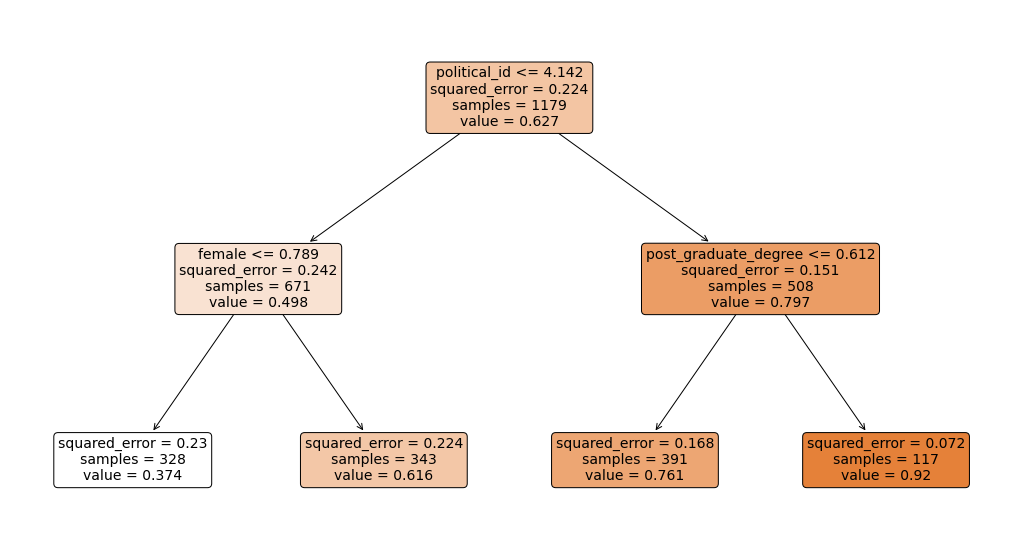

In [143]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(ban_guns_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [144]:
feature_names = list(X_train.columns)
print(tree.export_text(ban_guns_tree, feature_names=feature_names))

|--- political_id <= 4.14
|   |--- female <= 0.79
|   |   |--- value: [0.37]
|   |--- female >  0.79
|   |   |--- value: [0.62]
|--- political_id >  4.14
|   |--- post_graduate_degree <= 0.61
|   |   |--- value: [0.76]
|   |--- post_graduate_degree >  0.61
|   |   |--- value: [0.92]



In [145]:
ban_guns_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.15521032147153868

Desision tree's score = 0.15521032147153868 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### High-Capacity Magazine Ban
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 2.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["ban_clips"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


Now we will run decision tree regressor with `max_depth=2`.

In [147]:
ban_clips_tree = DecisionTreeRegressor(max_depth=2)

ban_clips_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=2)

Here are the visualizations of the data with two different ways.

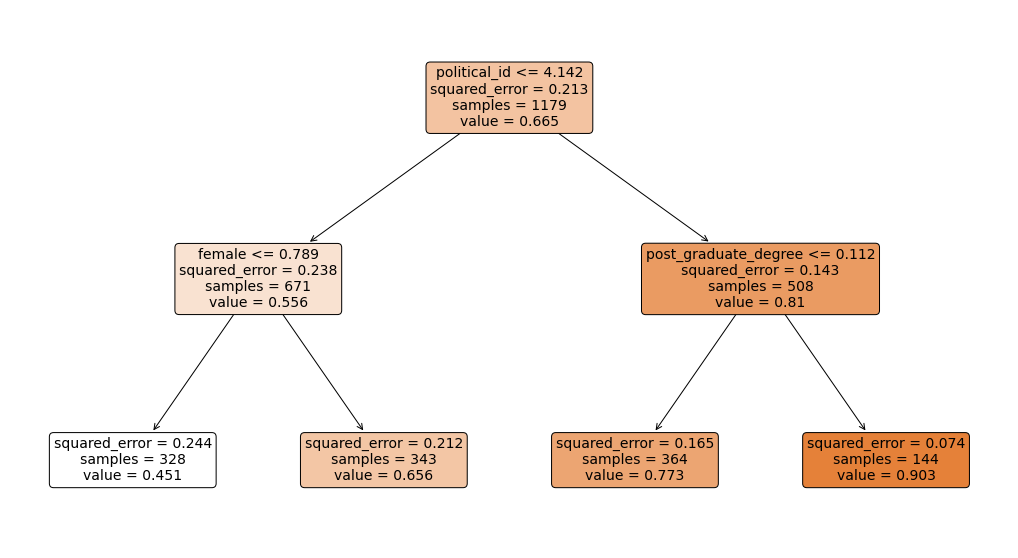

In [148]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(ban_clips_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [149]:
feature_names = list(X_train.columns)
print(tree.export_text(ban_clips_tree, feature_names=feature_names))

|--- political_id <= 4.14
|   |--- female <= 0.79
|   |   |--- value: [0.45]
|   |--- female >  0.79
|   |   |--- value: [0.66]
|--- political_id >  4.14
|   |--- post_graduate_degree <= 0.11
|   |   |--- value: [0.77]
|   |--- post_graduate_degree >  0.11
|   |   |--- value: [0.90]



In [150]:
ban_clips_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.12896331921276727

Desision tree's score = 0.12896331921276727 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### Cilivian Hand Gun Possession Ban
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 2.

In [151]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["ban_handguns"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


Now we will run decision tree regressor with `max_depth=2`.

In [152]:
ban_handguns_tree = DecisionTreeRegressor(max_depth=2)

ban_handguns_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=2)

Here are the visualizations of the data with two different ways.

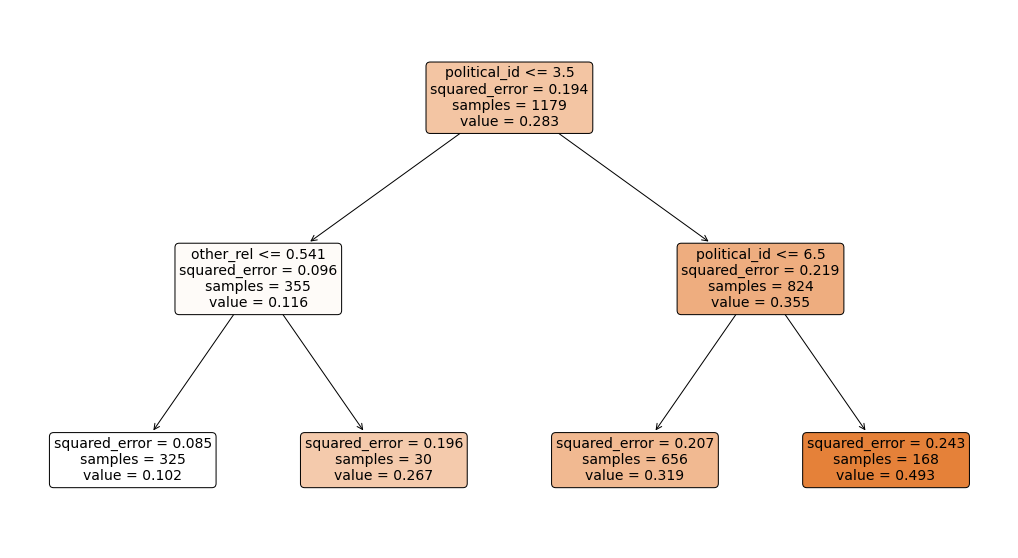

In [153]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(ban_handguns_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [154]:
feature_names = list(X_train.columns)
print(tree.export_text(ban_handguns_tree, feature_names=feature_names))

|--- political_id <= 3.50
|   |--- other_rel <= 0.54
|   |   |--- value: [0.10]
|   |--- other_rel >  0.54
|   |   |--- value: [0.27]
|--- political_id >  3.50
|   |--- political_id <= 6.50
|   |   |--- value: [0.32]
|   |--- political_id >  6.50
|   |   |--- value: [0.49]



In [155]:
ban_handguns_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.09640196681058044

Desision tree's score = 0.09640196681058044 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### Support for Concealed Carry
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 2.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["supp_carry_laws"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv1 = KFold(n_splits=5, shuffle=True, random_state=13)
clf1 = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv1)

clf1 = clf1.fit(X_train, y_train)
print(clf1.best_estimator_)
print(clf1.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


Now we will run decision tree regressor with `max_depth=2`.

In [157]:
supp_carry_laws_tree = DecisionTreeRegressor(max_depth=2)

supp_carry_laws_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=2)

Here are the visualizations of the data with two different ways.

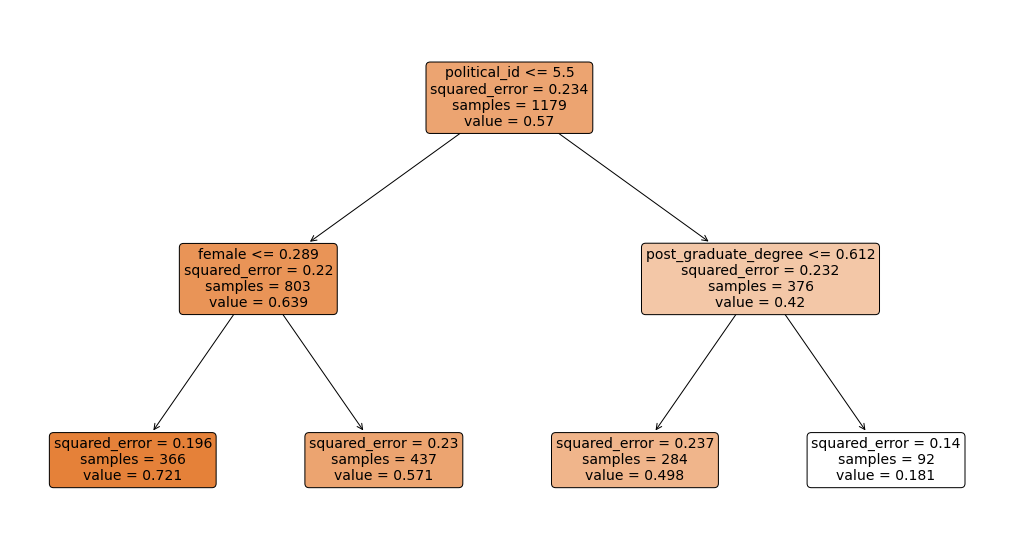

In [158]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(supp_carry_laws_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [159]:
feature_names = list(X_train.columns)
print(tree.export_text(supp_carry_laws_tree, feature_names=feature_names))

|--- political_id <= 5.50
|   |--- female <= 0.29
|   |   |--- value: [0.72]
|   |--- female >  0.29
|   |   |--- value: [0.57]
|--- political_id >  5.50
|   |--- post_graduate_degree <= 0.61
|   |   |--- value: [0.50]
|   |--- post_graduate_degree >  0.61
|   |   |--- value: [0.18]



In [160]:
supp_carry_laws_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.04769938360798076

Desision tree's score = 0.04769938360798076 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### More Armed Security at Schools
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 2.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["school_sec"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv2 = KFold(n_splits=5, shuffle=True, random_state=13)
clf2 = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv2)

clf2 = clf2.fit(X_train, y_train)
print(clf2.best_estimator_)
print(clf2.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


Now we will run decision tree regressor with `max_depth=2`.

In [162]:
school_sec_tree = DecisionTreeRegressor(max_depth=2)

school_sec_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=2)

Here are the visualizations of the data.

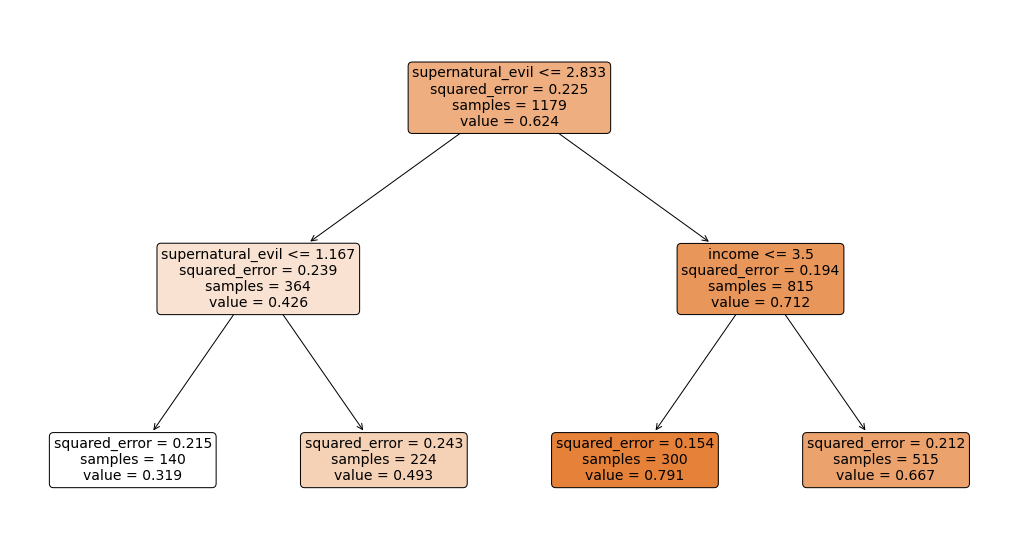

In [163]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(school_sec_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [164]:
feature_names = list(X_train.columns)
print(tree.export_text(school_sec_tree, feature_names=feature_names))

|--- supernatural_evil <= 2.83
|   |--- supernatural_evil <= 1.17
|   |   |--- value: [0.32]
|   |--- supernatural_evil >  1.17
|   |   |--- value: [0.49]
|--- supernatural_evil >  2.83
|   |--- income <= 3.50
|   |   |--- value: [0.79]
|   |--- income >  3.50
|   |   |--- value: [0.67]



In [165]:
school_sec_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.010970852640362017

Desision tree's score = 0.010970852640362017is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### More Teachers / Faculty with Guns
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 2.

In [166]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["teachers_with_guns"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


Now we will run decision tree regressor with `max_depth=2`.

In [167]:
teachers_with_guns_tree = DecisionTreeRegressor(max_depth=2)

teachers_with_guns_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=2)

Here are the visualizations of the data.

In [168]:
feature_names = list(X_train.columns)
print(tree.export_text(teachers_with_guns_tree, feature_names=feature_names))

|--- political_id <= 4.64
|   |--- political_id <= 1.50
|   |   |--- value: [0.58]
|   |--- political_id >  1.50
|   |   |--- value: [0.35]
|--- political_id >  4.64
|   |--- post_graduate_degree <= 0.61
|   |   |--- value: [0.21]
|   |--- post_graduate_degree >  0.61
|   |   |--- value: [0.03]



In [169]:
teachers_with_guns_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.04039667527404789

Desision tree's score = 0.04039667527404811 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### Required Gun Safety Programs
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 1.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["safety_progr"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}


Now we will run decision tree regressor with `max_depth=1`.

In [171]:
safety_progr_tree = DecisionTreeRegressor(max_depth=1)

safety_progr_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=1)

Here are the visualizations of the data.

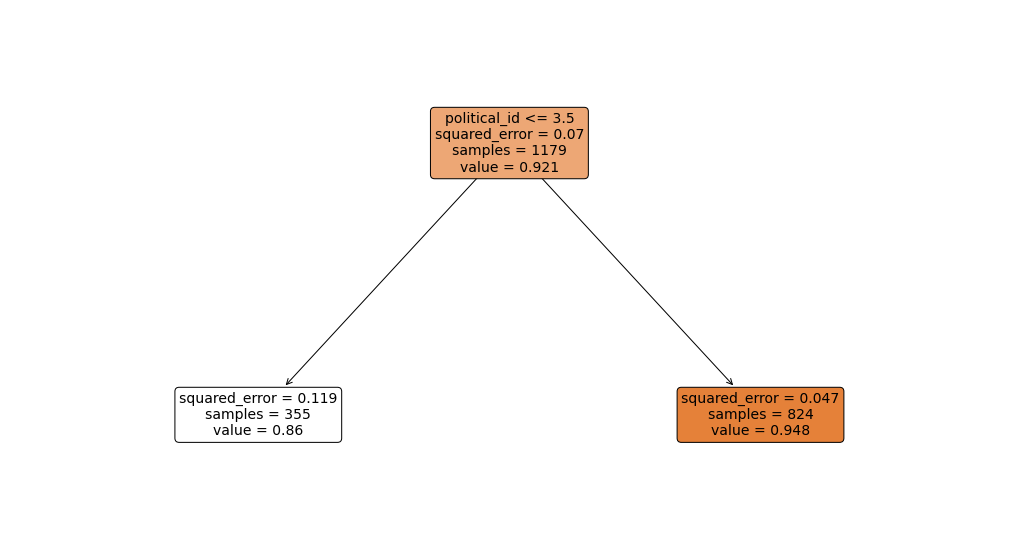

In [172]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(safety_progr_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [173]:
feature_names = list(X_train.columns)
print(tree.export_text(safety_progr_tree, feature_names=feature_names))

|--- political_id <= 3.50
|   |--- value: [0.86]
|--- political_id >  3.50
|   |--- value: [0.95]



In [174]:
safety_progr_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


-0.032729675962721805

Desision tree's score = -0.032729675962721805 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.

### Expanded Mental Health Screening
In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 1.

In [175]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, work_data["m_health_screening"], random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train )
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}


Now we will run decision tree regressor with `max_depth=1`.

In [176]:
m_health_screening_tree = DecisionTreeRegressor(max_depth=1)

m_health_screening_tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(max_depth=1)

Here are the visualizations of the data.

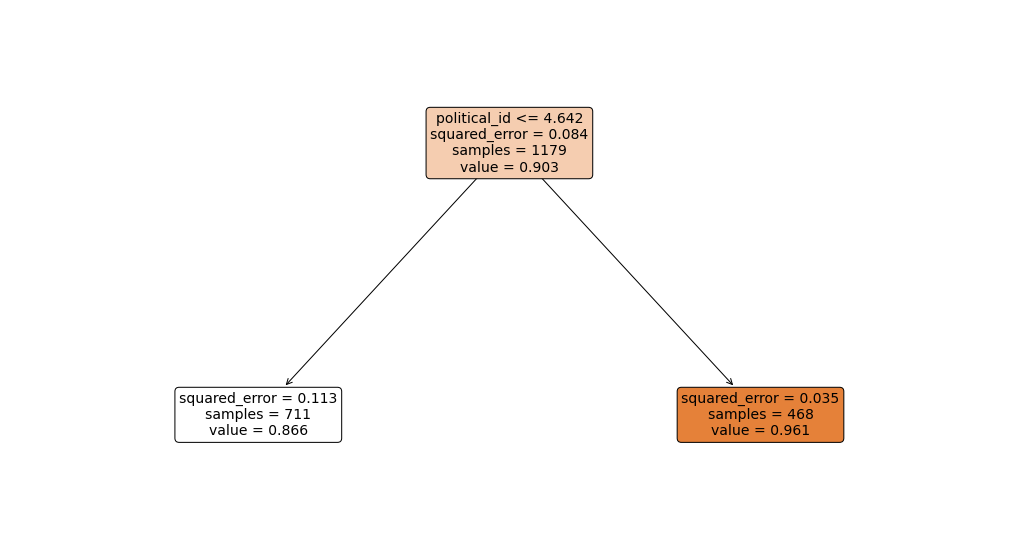

In [177]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(m_health_screening_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

In [178]:
feature_names = list(X_train.columns)
print(tree.export_text(m_health_screening_tree, feature_names=feature_names))

|--- political_id <= 4.64
|   |--- value: [0.87]
|--- political_id >  4.64
|   |--- value: [0.96]



In [179]:
m_health_screening_tree.score(X_test, y_test)

c:\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.03919729261881921

Desision tree's score = 0.039197292618819324 is really low, but it is something we expected because R-square and Pseudo R-square were low in linear and logistic regression when we run the models.